In [578]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from dateutil import parser
from datetime import datetime
sns.set_style('darkgrid')

In [579]:
df1 = pd.read_excel('O2D_delay_data.xlsx', 'logistics')
df2 = pd.read_excel('O2D_delay_data.xlsx', 'po_level')
df2 = df2[df2['order_status'].str.lower() == 'completed']
# df2 = df2[['buyer_name', 'seller_name', 'seller_po_number', 'seller_po_status', 'transporter_type' , 'seller_po_creation_date', 'buyer_invoice_item_quantity', 'po_quantity', 'order_completion_percentage', 'o2d_']]
df1.head()

,sno,date,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,dispatch_to_delivery_tat,unloading_tat,vehicle_level_o2d
0,1,2024-04-12,PO/25/MH/96,60.0,2024-04-12,RMC - Aluminium,29.709999,Raipur,Gandhinagar,April 2 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/12/2024 20:07:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/13/2024 11:52:00,4/13/2024 23:59:59,4/13/2024 12:51:00,4/13/2024 15:57:00,4/13/2024 18:02:00,4/16/2024 9:55:00,4/16/2024 10:15:00,4/16/2024 13:30:00,0.032280,0.000012,0.656262,0.040984,0.215984,-0.464583,0.003484,2.661817,0.149317,0.945463
1,2,2024-04-10,PO/25/MH/73,300.0,2024-04-10,RMC - Steel,39.230000,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 14:10:00,4/15/2024 15:32:00,4/18/2024 9:00:00,4/18/2024 10:12:00,4/19/2024 10:45:00,2.073854,0.000012,0.904178,0.544456,1.337512,-0.690278,0.010428,2.727789,1.072928,4.859950
2,3,2024-04-10,PO/25/MH/73,300.0,2024-04-10,RMC - Steel,34.189999,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 16:37:00,4/15/2024 17:20:00,4/18/2024 12:00:00,4/18/2024 12:00:00,4/19/2024 11:30:00,2.073854,0.000012,0.904178,0.544456,1.412512,-0.690278,0.010428,2.777789,0.979178,4.934950
3,4,2024-04-12,PO/25/MH/96,60.0,2024-04-12,RMC - Aluminium,29.260000,Raipur,Gandhinagar,April 3 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/14/2024 21:50:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/15/2024 11:55:00,4/15/2024 23:59:59,4/15/2024 13:30:00,4/15/2024 17:55:00,4/15/2024 19:30:00,4/17/2024 20:00:00,4/18/2024 15:20:00,4/18/2024 16:30:00,0.032280,2.071539,0.586817,0.065984,0.250012,-0.437500,0.003484,2.020845,0.854178,3.006570
4,5,2024-04-16,PO/25/HA/111,600.0,2024-04-16,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,4/22/2024 11:00:00,4/19/2024 23:59:59,04/24/24 4:05:00,04/24/24 14:02:00,04/24/2024 22:15:00,4/26/2024 23:00:00,04/27/2024 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,2.031262,1.666678,8.180850


In [580]:
df2_selected_cols = df2[['buyer_name', 'seller_name', 'seller_po_number',
       'transporter_type', 'order_type',
       'order_completion_percentage', 'o2d_', 'O2D_Bucket']]
df = df1.merge(df2_selected_cols, left_on='po_number', right_on = 'seller_po_number', how = 'left')

# df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'], format='%m/%d/%y %H:%M:%S')
df = df.sort_values(by=['po_number', 'vehicle_unloaded_ts'])

# ## removing all the po which has NA in dispatched_qty
# dispatch_qty_na_po = set(df[df['dispatched_qty'].isna()]['po_number'].unique())
# print('Shape of df before filtering the po with NAN dispatch_qty')
# print(df.shape)
# df = df[~df['po_number'].isin(dispatch_qty_na_po)]
# print('Shape of df after filtering the po with NAN dispatch_qty')
print(df.shape)

## Renaming the category
df.loc[(df['category'] == 'RMX - Steel'), 'category'] = 'RMC - Steel'
df.loc[(df['transporter_type'] == 'Bizongo Non O2D'), 'transporter_type'] = 'Bizongo'

## Ranking the order of the transport
df['order'] = df.groupby('po_number')[['vehicle_reached_delivery_location_ts']].rank(method='first')
df = df[~df['po_number'].isin(['PO/25/MH/498','PO/25/MH/564', 'PO/25/MH/568'])]
df = df[~df['po_qty'].isna()]

## Route
df['route'] = df['origin'].str.lower() + '-' + df['destination'].str.lower()
df['lane_order'] = df.groupby('route')[['po_ts']].rank(method='min')
df.rename(columns = {'o2d_' : 'O2D_'}, inplace = True)

### Month wise
df['po_ts'] = df['po_ts'].astype(str)
def safe_parse(date_str):
    try:
        return parser.parse(date_str)
    except (ValueError, TypeError):
        return pd.NaT

df['po_ts'] = df['po_ts'].apply(safe_parse)
df['Month'] = df['po_ts'].dt.strftime('%B')


### Total rounds 

po_count = df['po_number'].value_counts().reset_index()
po_count.rename(columns = {'count' : 'total_rounds'}, inplace = True)
df = df.merge(po_count, on = 'po_number')

print(df.shape)

(163, 41)
(158, 46)


In [581]:
import pandas as pd
import numpy as np
from datetime import datetime

def convert_date_format(date_str):
    if pd.isna(date_str):
        return np.nan
    
    if isinstance(date_str, pd.Timestamp):
        return date_str
    
    if isinstance(date_str, str):
        # Remove AM/PM if present
        date_str = date_str.replace(" AM", "").replace(" PM", "")
        
        # Ensure there is a space between the date and time parts
        if ' ' not in date_str.split()[0]:
            date_str = date_str[:10] + ' ' + date_str[10:]
        
        # Remove any extra spaces before the time part
        date_str = date_str.strip()
        if ' :' in date_str:
            date_str = date_str.replace(' :', ' ')
        
        # Add seconds if not present in the input string
        if len(date_str.split(':')) == 2:
            date_str += ":00"
        
        # Remove leading zeros from month and day
        parts = date_str.split()
        date_part = parts[0].split('/')
        time_part = parts[1] if len(parts) > 1 else ""
        
        date_part = [str(int(part)) for part in date_part]
        date_str = '/'.join(date_part) + ' ' + time_part
        
        possible_formats = [
            "%Y-%m-%d %H:%M:%S",   # Format for "2024-04-19 23:59:59"
            "%m/%d/%y %H:%M:%S",
            "%m/%d/%Y %H:%M:%S",
            "%-m/%-d/%y %H:%M:%S",   # Single-digit month and day
            "%-m/%-d/%Y %H:%M:%S",   # Single-digit month and day
        ]
        
        for fmt in possible_formats:
            try:
                dt = datetime.strptime(date_str, fmt)
                return dt
            except ValueError:
                pass
    else:
        raise DateFormatError(f"Unable to parse date: {date_str}")



# Assuming df is already defined
df['vehicle_dispatched_ts'] = df['vehicle_dispatched_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_reported_ts'] = df['vehicle_reported_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_loaded_ts'] = df['vehicle_loaded_ts'].apply(lambda x: convert_date_format(x))

# Convert the date columns back to datetime
df['vehicle_dispatched_ts'] = pd.to_datetime(df['vehicle_dispatched_ts'])
df['vehicle_reported_ts'] = pd.to_datetime(df['vehicle_reported_ts'])
df['vehicle_loaded_ts'] = pd.to_datetime(df['vehicle_loaded_ts'])

df['expected_date_of_vehicle_reporting'] = pd.to_datetime(df['expected_date_of_vehicle_reporting'], errors='coerce')
df['order'] = df.groupby('po_number')['vehicle_reported_ts'].rank(method='dense')

df3 = df[['po_number', 'po_qty', 'po_ts', 'category', 'dispatched_qty', 'origin', 'destination', 'O2D_', 'vehicle_dispatched_ts', 'vehicle_reported_ts', 'vehicle_loaded_ts', 'buyer_name', 'seller_name','order','route', 'Month', 'total_rounds', 'vehicle_placement_ts']]

df3['vehicle_reported_to_dispatch_tat'] = (df3['vehicle_dispatched_ts'] - df3['vehicle_reported_ts']).dt.total_seconds() / (3600 * 24)
df3['vehicle_reported_to_load_tat'] = (df3['vehicle_loaded_ts'] - df3['vehicle_reported_ts']).dt.total_seconds() / (3600 * 24)
df3['vehicle_loaded_to_dispatch_tat'] = (df3['vehicle_dispatched_ts'] - df3['vehicle_loaded_ts']).dt.total_seconds() / (3600 * 24)


route = df3[['route']]
df3 = pd.get_dummies(df3, columns=['route'], prefix='route')
df3 = df3.replace({True: 1, False: 0})
df3 = pd.concat([df3, route], axis=1)


/tmp/ipykernel_87702/1327701987.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['vehicle_reported_to_dispatch_tat'] = (df3['vehicle_dispatched_ts'] - df3['vehicle_reported_ts']).dt.total_seconds() / (3600 * 24)
/tmp/ipykernel_87702/1327701987.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['vehicle_reported_to_load_tat'] = (df3['vehicle_loaded_ts'] - df3['vehicle_reported_ts']).dt.total_seconds() / (3600 * 24)
/tmp/ipykernel_87702/1327701987.py:73: SettingWithCopyWarning: 
A value is tryin

In [583]:
df.groupby(['seller_name', 'route', 'category']).agg(
    total_qty=('po_qty', 'mean'), 
    total_rounds=('total_rounds', 'mean'),
    mean_o2d=('O2D_', 'mean')
)


total_qty  \
seller_name                              route                 category                      
ASAN STEELS PRIVATE LIMITED              raipur-jalna          RMC - Steel      430.434783   
Bizongo Purchase                         raipur-hadapsar       RMC - Aluminium   25.000000   
                                         raipur-kheda          RMC - Aluminium   67.500000   
                                         raipur-raipur         RMC - Aluminium   21.666667   
                                         raipur-vilad          RMC - Aluminium   25.000000   
JAGDAMBA STEELS                          raipur-medak          RMC - Aluminium   30.000000   
JHARKHAND ISPAT PRIVATE LIMITED          ramgarh-jaipur        RMC - Steel      126.000000   
KANSAL METAL PRIVATE LIMITED             raipur-gandhinagar    RMC - Aluminium   53.333333   
                                         raipur-kheda          RMC - Aluminium   56.000000   
                                         raipur-medak          RMC - Aluminium   30.000000   
                                         raipur-varanasi       RMC - Aluminium   12.000000   
                                         visakhapatnam-kheda   RMC - Aluminium   40.000000   
                                         visakhapatnam-medak   RMC - Aluminium   30.000000   
MAAN ALUMINIUM LIMITED                   hyderabad-hyderabad   RMC - Aluminium   10.000000   
NEPTUNE ISPAT PRIVATE LIMITED            burdwan-sikendarabad  RMC - Steel      126.000000   
                                         durgapur-jaipur       RMC - Steel       84.000000   
                                         durgapur-pali         RMC - Steel      126.000000   
                                         durgapur-sikendarabad RMC - Steel      300.000000   
NUTAN ISPAT AND POWER PRIVATE LIMITED    raipur-ahmedabad      RMC - Steel      200.000000   
                                         raipur-bavla          RMC - Steel       84.000000   
SHREESATYA STEEL & POWER PRIVATE LIMITED bardhaman-jaipur      RMC - Steel      126.000000   
                                         bardhman-jaipur       RMC - Steel      126.000000   
                                         burdwan-jaipur        RMC - Steel      200.000000   
                                         durgapur-jaipur       RMC - Steel      126.000000   
SRI BALAHA CHEMICALS PRIVATE LIMITED     korba-bhubneshawar    RMC - Aluminium   20.000000   
SUMANGAL ISPAT PVT LTD                   durgapur-beawer       RMC - Steel       42.000000   
                                         durgapur-jaipur       RMC - Steel      388.952381   
                                         durgapur-sikendarabad RMC - Steel      488.888889   
SUNIL SPONGE PRIVATE LIMITED             raipur-jalna          RMC - Steel      210.000000   
SWARNAGIRI INSULATING COMPANY INDIA      kolkata-jharkhand     RMC - Aluminium   75.000000   
Tata International Limited               jaipur-ghaziabad      RMC - Aluminium   25.000000   

                                                                                total_rounds  \
seller_name                              route                 category                        
ASAN STEELS PRIVATE LIMITED              raipur-jalna          RMC - Steel         12.565217   
Bizongo Purchase                         raipur-hadapsar       RMC - Aluminium      1.000000   
                                         raipur-kheda          RMC - Aluminium      2.500000   
                                         raipur-raipur         RMC - Aluminium      1.000000   
                                         raipur-vilad          RMC - Aluminium      1.000000   
JAGDAMBA STEELS                          raipur-medak          RMC - Aluminium      1.000000   
JHARKHAND ISPAT PRIVATE LIMITED          ramgarh-jaipur        RMC - Steel          3.000000   
KANSAL METAL PRIVATE LIMITED             raipur-gandhinagar    RMC - Aluminium      1.666667   
                  

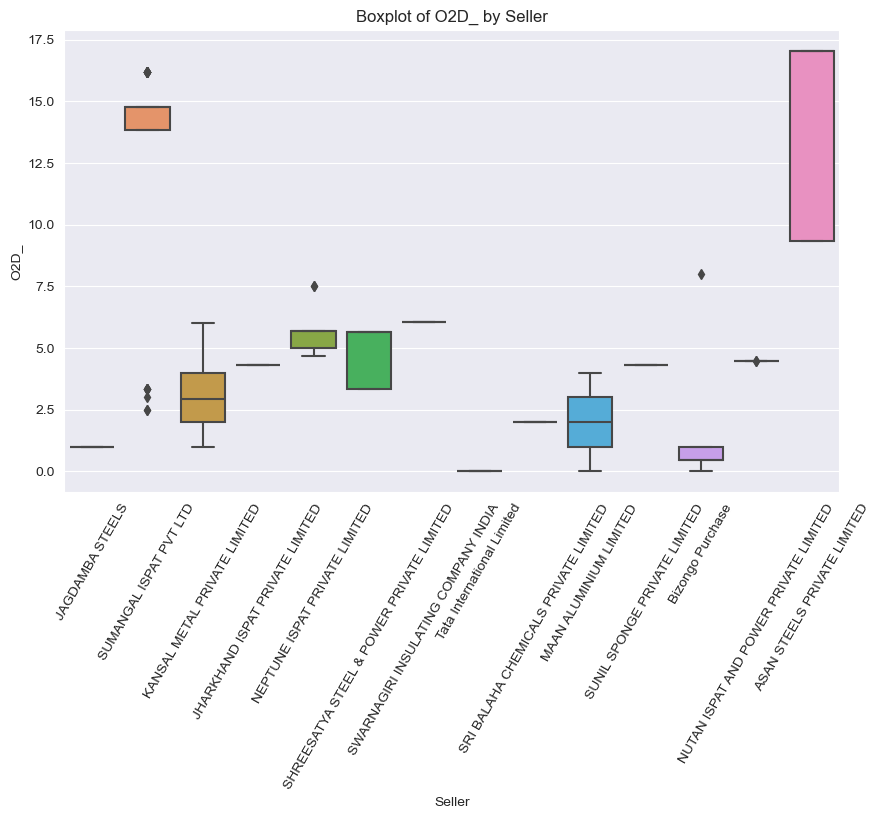

In [584]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_name', y='O2D_', data=df)

# Add title and labels
plt.title('Boxplot of O2D_ by Seller')
plt.xlabel('Seller')
plt.ylabel('O2D_')
plt.xticks(rotation = 60)

# Show plot
plt.show()

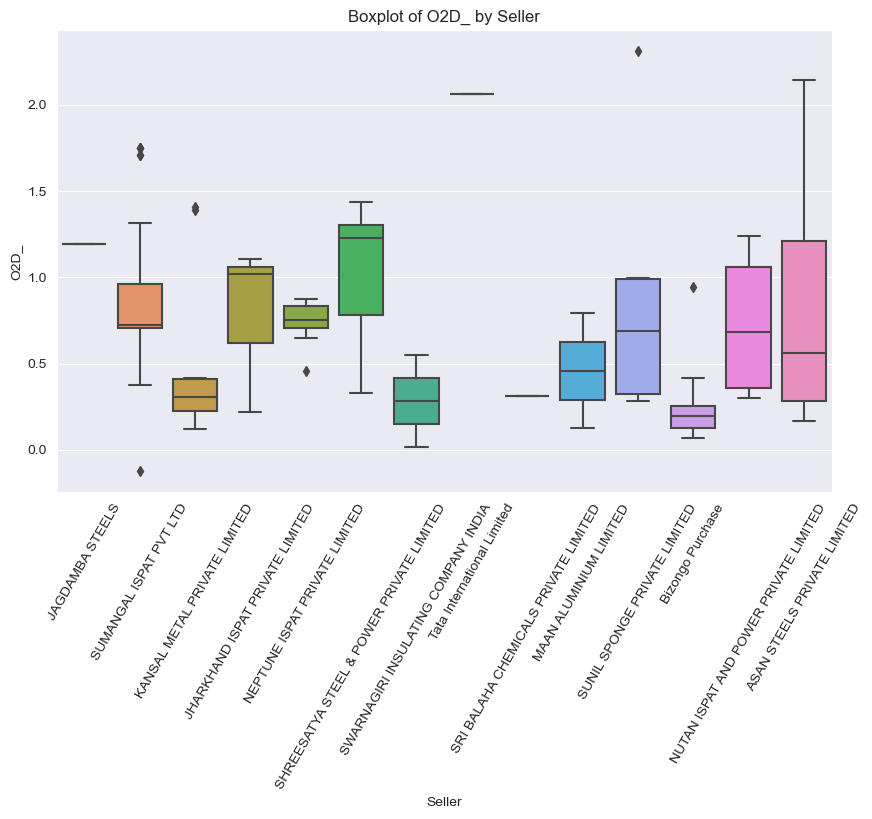

In [585]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_name', y='vehicle_reported_to_dispatch_tat', data=df3)

# Add title and labels
plt.title('Boxplot of O2D_ by Seller')
plt.xlabel('Seller')
plt.ylabel('O2D_')
plt.xticks(rotation = 60)

# Show plot
plt.show()

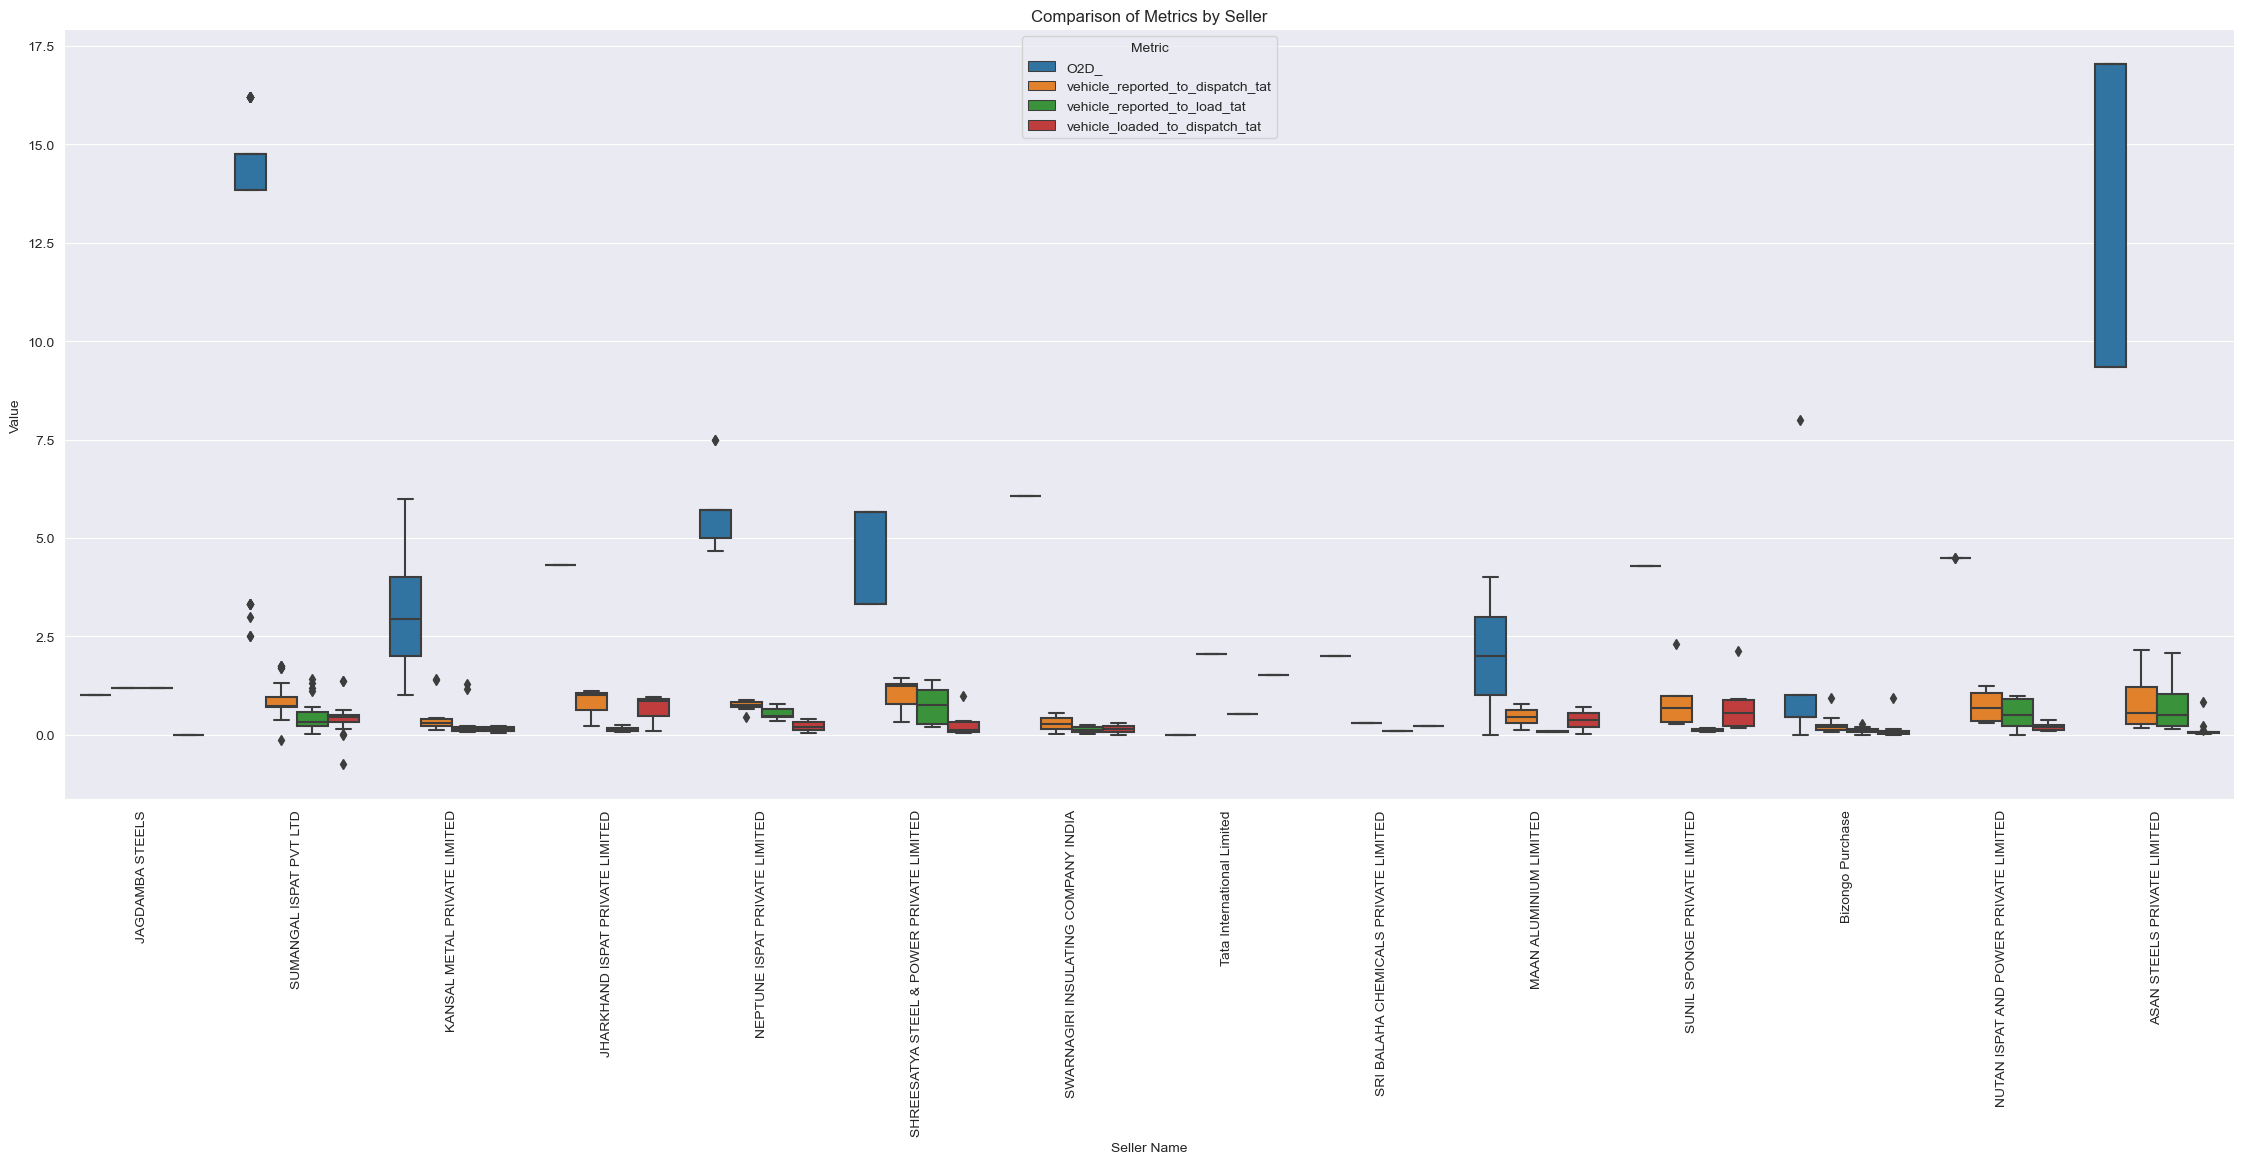

In [586]:
df_melted = pd.melt(df3, id_vars=['seller_name'], 
                    value_vars=['O2D_', 'vehicle_reported_to_dispatch_tat', 'vehicle_reported_to_load_tat',
                               'vehicle_loaded_to_dispatch_tat'],
                    var_name='Metric', value_name='Value')

# Create a boxplot
plt.figure(figsize=(28, 10))
sns.boxplot(x='seller_name', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Comparison of Metrics by Seller')
plt.xlabel('Seller Name')
plt.ylabel('Value')
plt.xticks(rotation = 90
          )

# Show plot
plt.legend(title='Metric')
plt.show()

/tmp/ipykernel_87702/3127609360.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_april_df[columns_to_scale] = scaler.fit_transform(non_april_df[columns_to_scale])


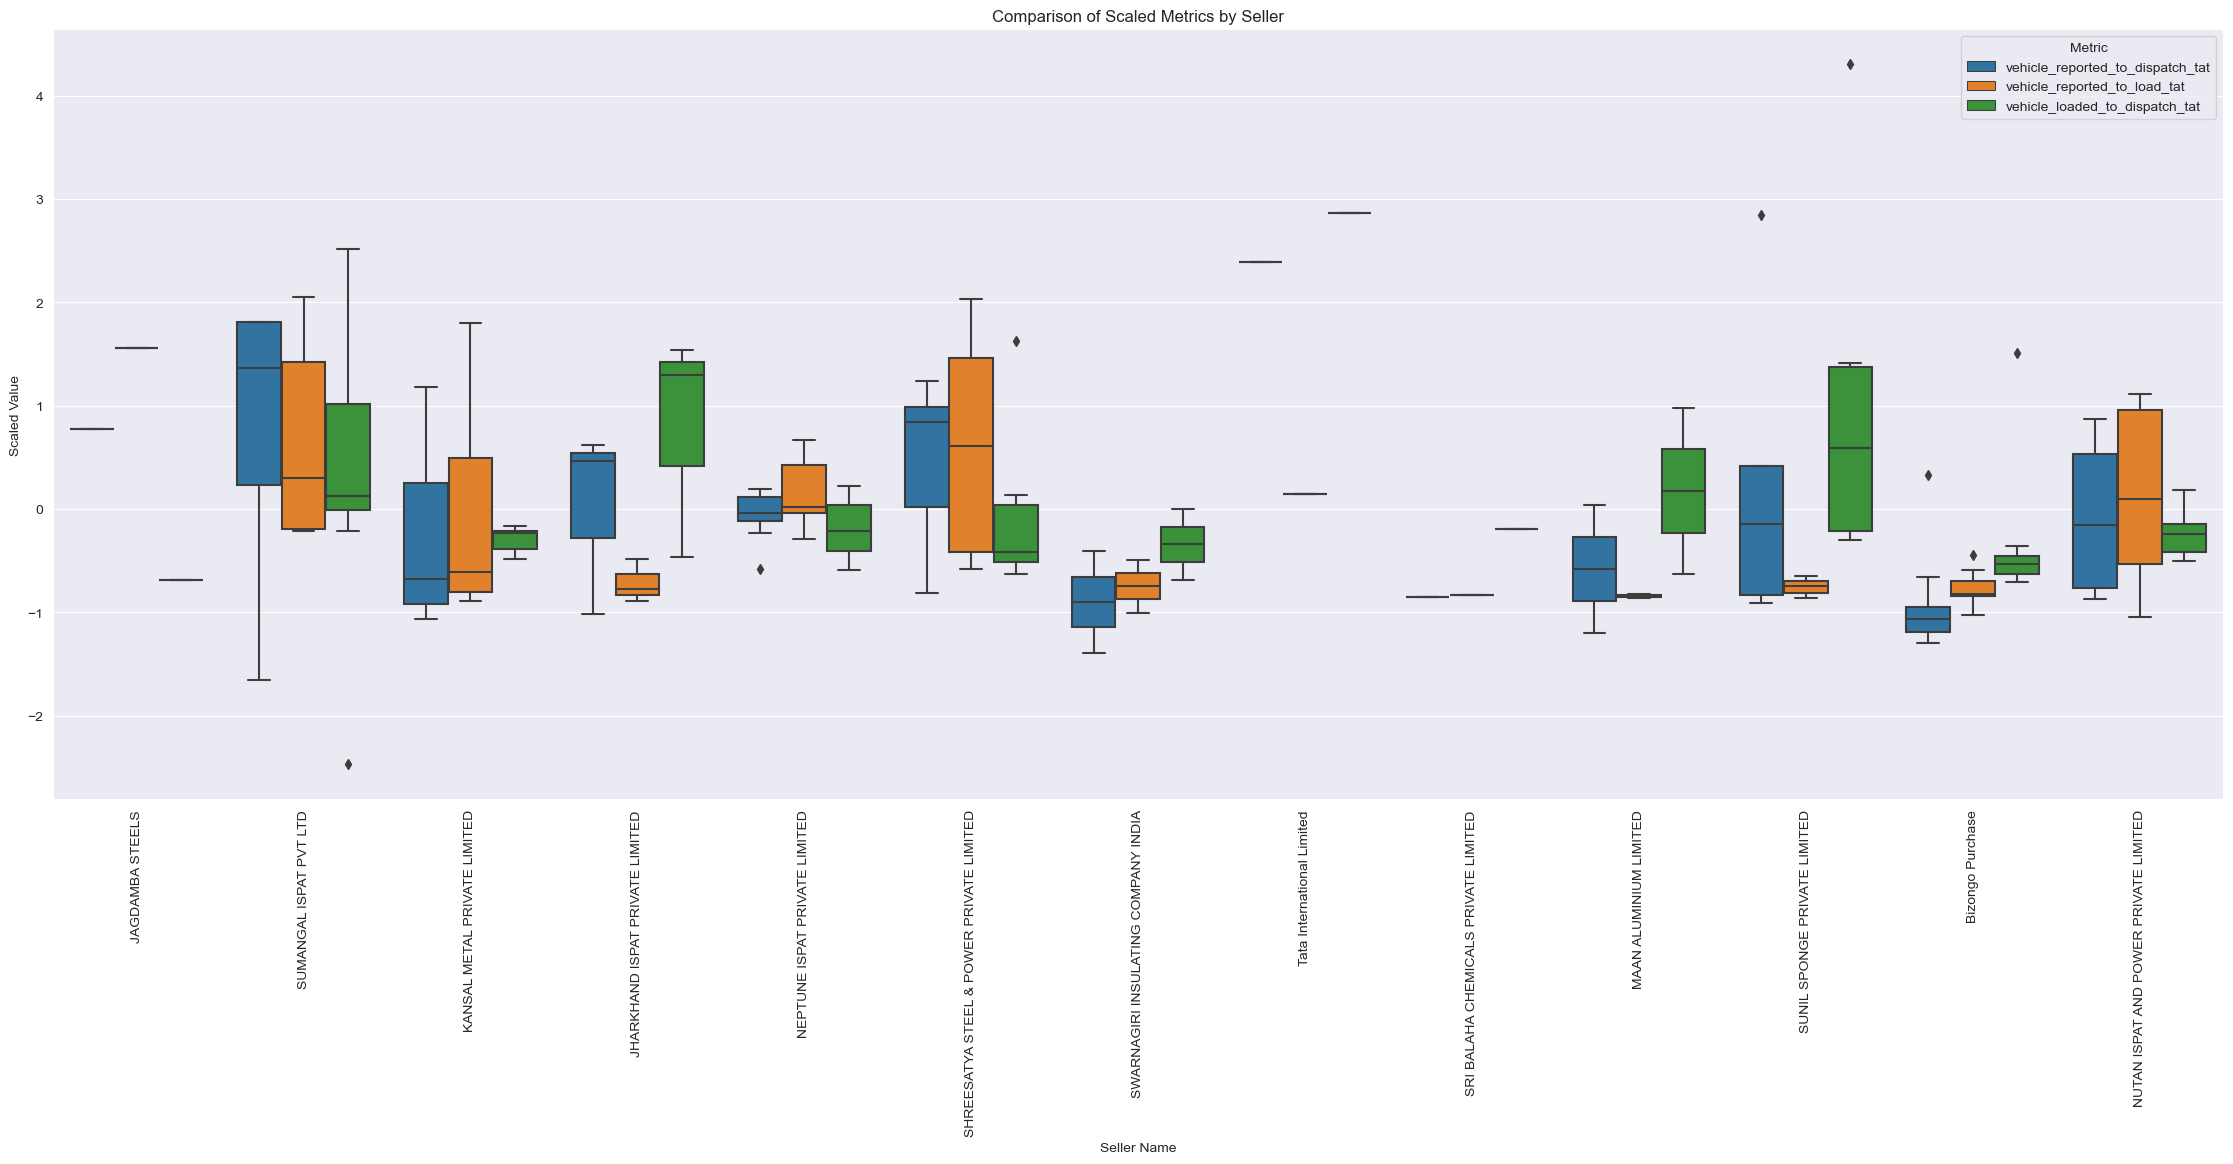

In [587]:
from sklearn.preprocessing import StandardScaler

non_april_df = df3[df3['Month'] != 'April']
columns_to_scale = ['vehicle_reported_to_dispatch_tat', 'vehicle_reported_to_load_tat', 'vehicle_loaded_to_dispatch_tat']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
non_april_df[columns_to_scale] = scaler.fit_transform(non_april_df[columns_to_scale])

# Reshape the DataFrame to long format
df_melted = pd.melt(non_april_df, id_vars=['seller_name'], 
                    value_vars=columns_to_scale,
                    var_name='Metric', value_name='Value')

# Create a boxplot
plt.figure(figsize=(28, 10))
sns.boxplot(x='seller_name', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Comparison of Scaled Metrics by Seller')
plt.xlabel('Seller Name')
plt.ylabel('Scaled Value')
plt.xticks(rotation=90)
# plt.grids()

# Show plot
plt.legend(title='Metric')
plt.show()

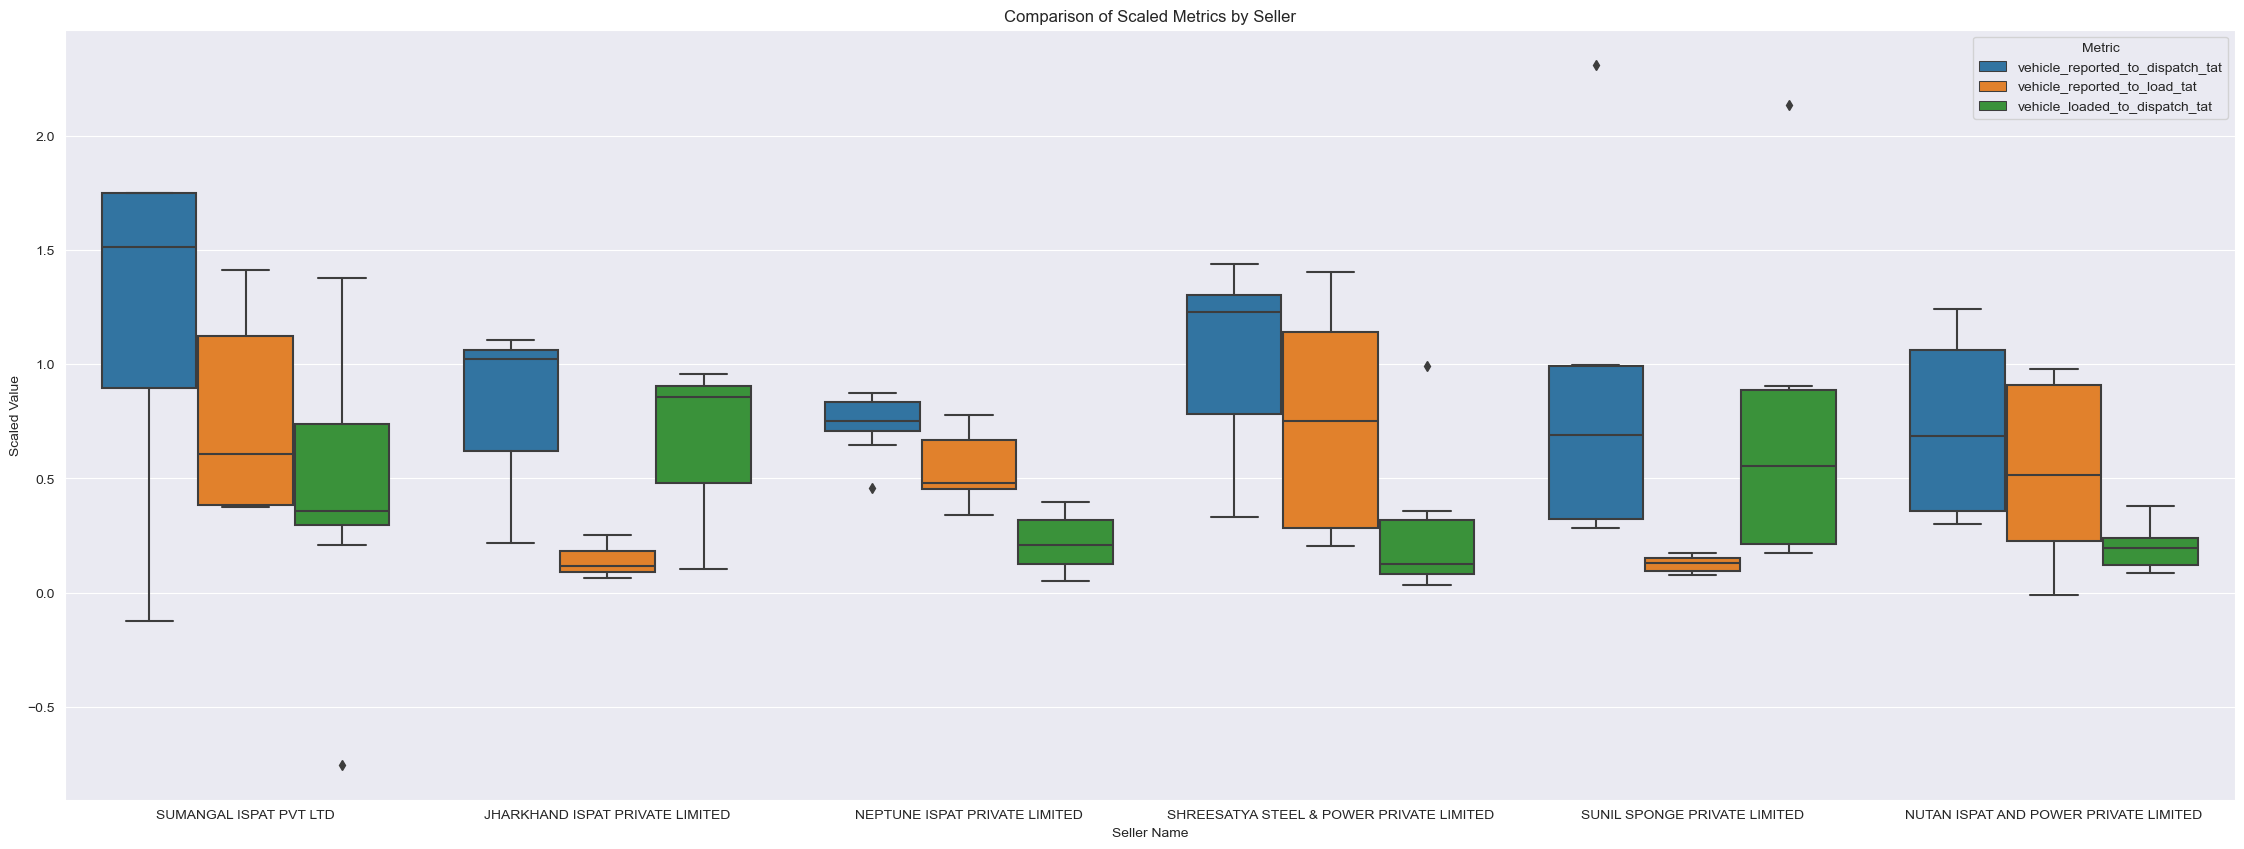

In [599]:
from sklearn.preprocessing import StandardScaler

non_april_df = df3[df3['Month'] != 'April']
st = non_april_df[non_april_df['category'] == 'RMC - Steel']
columns_to_scale = ['vehicle_reported_to_dispatch_tat', 'vehicle_reported_to_load_tat', 'vehicle_loaded_to_dispatch_tat']

# Reshape the DataFrame to long format
df_melted = pd.melt(st, id_vars=['seller_name'], 
                    value_vars=columns_to_scale,
                    var_name='Metric', value_name='Value')

# Create a boxplot
plt.figure(figsize=(28, 10))
sns.boxplot(x='seller_name', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Comparison of Scaled Metrics by Seller')
plt.xlabel('Seller Name')
plt.ylabel('Scaled Value')
plt.xticks(rotation=0)
# plt.grids()

# Show plot
plt.legend(title='Metric')
plt.show()

In [594]:
df3[(df3['category'] == 'RMC - Steel')&(df3['Month']!='April')].groupby(['seller_name'])[['po_qty', 'O2D_','vehicle_reported_to_dispatch_tat', 'vehicle_reported_to_load_tat', 'vehicle_loaded_to_dispatch_tat']].mean()


,po_qty,O2D_,vehicle_reported_to_dispatch_tat,vehicle_reported_to_load_tat,vehicle_loaded_to_dispatch_tat
seller_name,,,,,
JHARKHAND ISPAT PRIVATE LIMITED,126.000000,4.325251,0.781250,0.143056,0.638194
NEPTUNE ISPAT PRIVATE LIMITED,207.750000,5.599532,0.748512,0.536589,0.214137
NUTAN ISPAT AND POWER PRIVATE LIMITED,171.000000,4.491827,0.725174,0.528299,0.196875
SHREESATYA STEEL & POWER PRIVATE LIMITED,136.571429,4.664196,1.022917,0.743452,0.279464
SUMANGAL ISPAT PVT LTD,151.250000,3.074483,1.226562,0.756250,0.470313
SUNIL SPONGE PRIVATE LIMITED,210.000000,4.299592,0.876968,0.124884,0.752083


In [589]:
temp = st.groupby(['seller_name', 'po_number'])['po_qty'].max().reset_index()
temp

,seller_name,po_number,po_qty
0,JHARKHAND ISPAT PRIVATE LIMITED,PO/25/HA/577,126.0
1,NEPTUNE ISPAT PRIVATE LIMITED,PO/25/HA/590,300.0
2,NEPTUNE ISPAT PRIVATE LIMITED,PO/25/HA/598,84.0
3,NEPTUNE ISPAT PRIVATE LIMITED,PO/25/HA/600,126.0
4,NEPTUNE ISPAT PRIVATE LIMITED,PO/25/HA/682,126.0
5,NUTAN ISPAT AND POWER PRIVATE LIMITED,PO/25/MH/649,84.0
6,NUTAN ISPAT AND POWER PRIVATE LIMITED,PO/25/MH/654,200.0
7,SHREESATYA STEEL & POWER PRIVATE LIMITED,PO/25/HA/635,126.0
8,SHREESATYA STEEL & POWER PRIVATE LIMITED,PO/25/HA/664,200.0
9,SUMANGAL ISPAT PVT LTD,PO/25/HA/341,200.0


In [590]:
q = temp.groupby(['seller_name']).agg(total_po_count=('po_number', 'nunique'),
    sum_of_qty=('po_qty', 'sum'))
q.sort_values('sum_of_qty' , ascending = False)

,total_po_count,sum_of_qty
seller_name,,
NEPTUNE ISPAT PRIVATE LIMITED,4,636.0
SHREESATYA STEEL & POWER PRIVATE LIMITED,2,326.0
SUMANGAL ISPAT PVT LTD,3,326.0
NUTAN ISPAT AND POWER PRIVATE LIMITED,2,284.0
SUNIL SPONGE PRIVATE LIMITED,1,210.0
JHARKHAND ISPAT PRIVATE LIMITED,1,126.0


In [577]:
df[df['po_number'] == 'PO/25/HA/598']

,sno,date,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,dispatch_to_delivery_tat,unloading_tat,vehicle_level_o2d,buyer_name,seller_name,seller_po_number,transporter_type,order_type,order_completion_percentage,O2D_,O2D_Bucket,order,route,lane_order,Month,total_rounds
63,106,2024-06-17,PO/25/HA/598,84.0,2024-06-17,RMC - Steel,41.709999,Durgapur,Jaipur,June 3 Week,2024-06-17 17:50:00,06/17/2024 17:50:00,06/17/2024 22:59:00,06/18/2024 11:00:00,06/18/2024 11:30:00,06/22/2024 18:07:00,2024-06-19 10:00:00,2024-06-24 11:00:00,2024-06-24 19:07:00,2024-06-24 22:00:00,06/27/2024 17:46:00,NaN,06/29/2024 2:00:00,0.000012,0.214595,4.797234,1.703484,0.458345,5.041655,0.715289,2.823623,1.343067,NaN,Amar Partap Steels Pvt. Ltd.,NEPTUNE ISPAT PRIVATE LIMITED,PO/25/HA/598,Bizongo,S2B,98.297619,7.494853,6+ days,1.0,durgapur-jaipur,15.0,June,2
64,128,2024-06-17,PO/25/HA/598,84.0,2024-06-17,RMC - Steel,40.860001,Durgapur,Jaipur,June 4 Week,2024-06-17 17:50:00,06/17/2024 17:50:00,06/17/2024 22:59:00,06/18/2024 11:00:00,06/18/2024 11:30:00,06/24/2024 11:31:00,2024-06-19 18:00:00,2024-06-25 01:00:00,2024-06-25 19:38:00,2024-06-25 22:00:00,07/03/2024 2:00:00,NaN,NaN,0.000012,0.214595,6.522234,0.561817,0.875012,5.291655,0.715289,7.166678,4.916667,8.17361,Amar Partap Steels Pvt. Ltd.,NEPTUNE ISPAT PRIVATE LIMITED,PO/25/HA/598,Bizongo,S2B,98.297619,7.494853,6+ days,2.0,durgapur-jaipur,15.0,June,2


In [565]:
q['sum_of_qty'].sum()

1908.0

In [548]:
st.()

,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reported_ts,vehicle_loaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,vehicle_reported_to_dispatch_tat,vehicle_reported_to_load_tat,vehicle_loaded_to_dispatch_tat,route_bardhaman-jaipur,route_bardhman-jaipur,route_burdwan-jaipur,route_burdwan-sikendarabad,route_champa-ahmndabad,route_champa-bavla,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_raipur-ahmedabad,route_raipur-bavla,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_raipur-vilad,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route
42,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.650002,Durgapur,Jaipur,-0.939225,2024-05-11 22:00:00,2024-05-10 04:00:00,2024-05-10 13:00:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,1.0,May,5,05/09/2024 19:00:00,1.660750,-0.470147,2.338226,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
43,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.240002,Durgapur,Jaipur,-0.939225,2024-05-11 22:00:00,2024-05-10 04:00:00,2024-05-10 13:00:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,1.0,May,5,05/09/2024 19:00:00,1.660750,-0.470147,2.338226,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
44,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.230000,Durgapur,Jaipur,-0.939225,2024-05-11 22:00:00,2024-05-10 04:00:00,2024-05-11 13:55:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,1.0,May,5,05/09/2024 19:30:00,1.660750,1.916643,0.025182,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
45,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.660000,Durgapur,Jaipur,-0.939225,2024-05-11 22:00:00,2024-05-10 05:00:00,2024-05-11 09:27:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,2.0,May,5,05/09/2024 19:30:00,1.578767,1.392986,0.439828,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
46,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,31.480000,Durgapur,Jaipur,-0.939225,2024-05-13 17:00:00,2024-05-12 09:30:00,2024-05-13 12:00:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,3.0,May,5,05/12/2024 7:30:00,0.799926,1.206194,-0.261048,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur


In [547]:
st.shape

(61, 50)

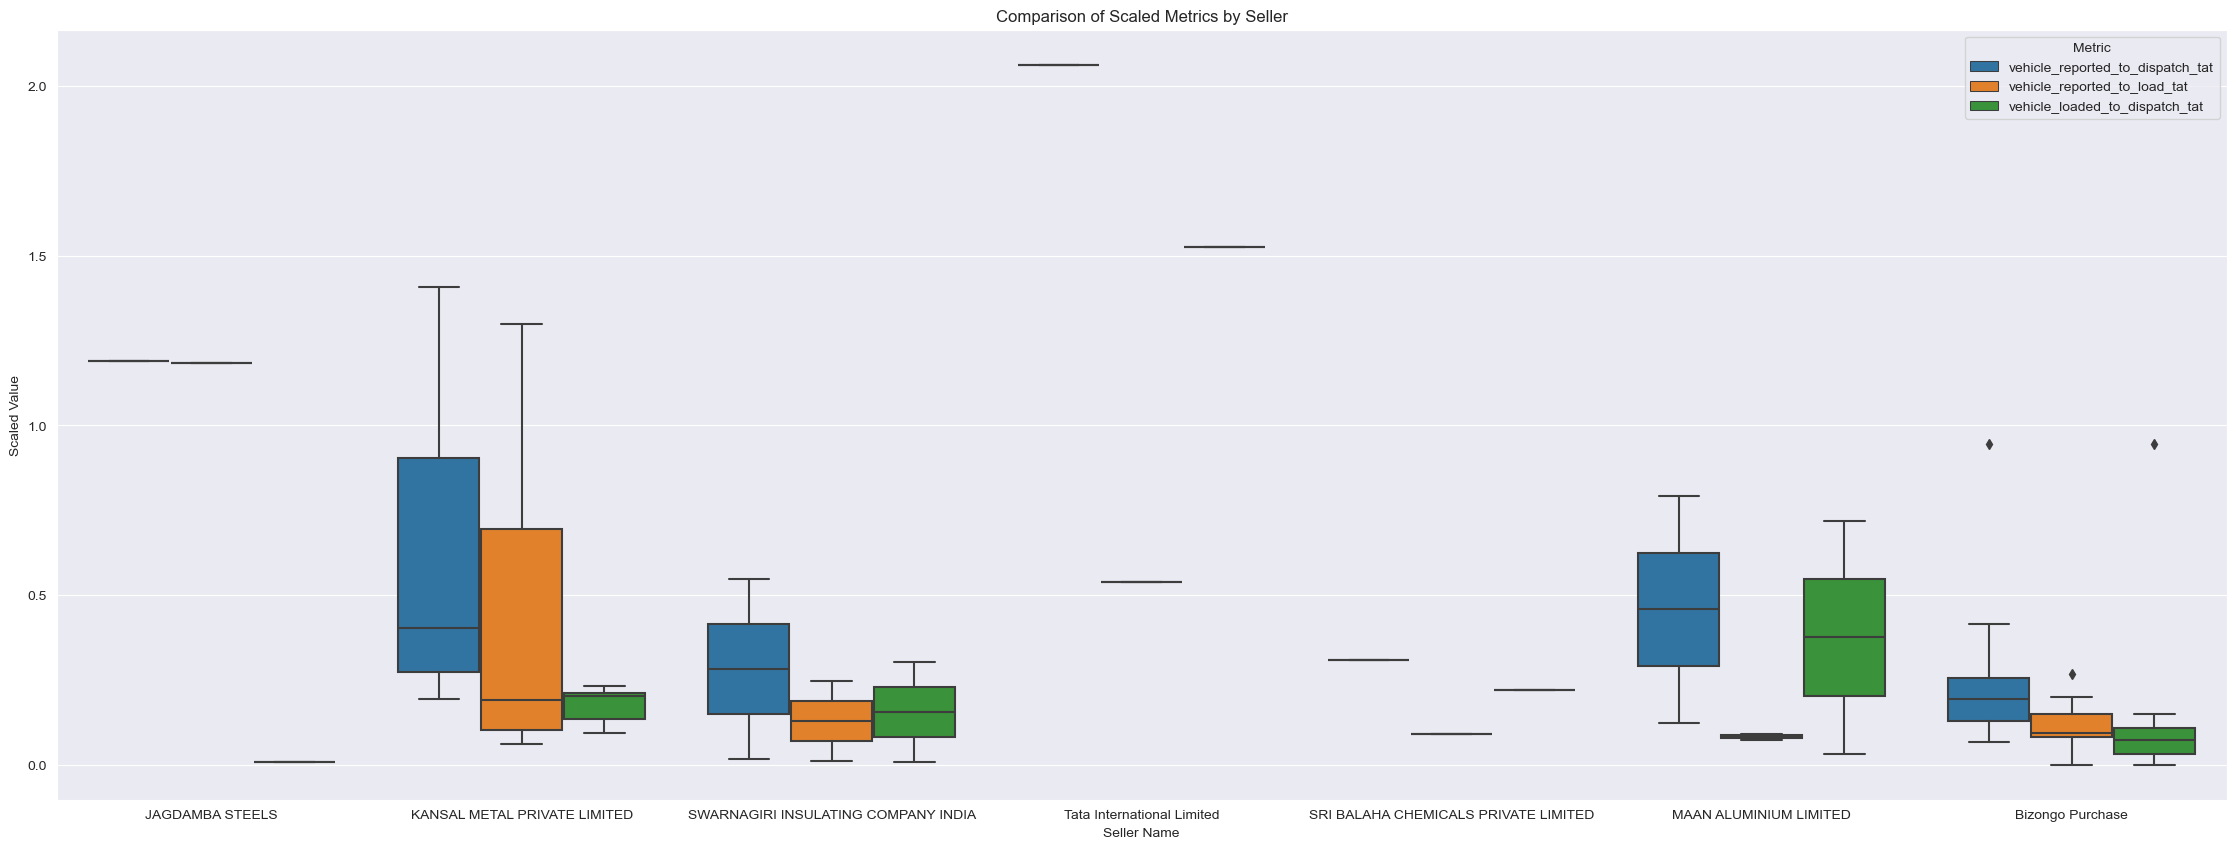

In [600]:
from sklearn.preprocessing import StandardScaler

non_april_df = df3[df3['Month'] != 'April']
al = non_april_df[non_april_df['category'] != 'RMC - Steel']
columns_to_scale = ['vehicle_reported_to_dispatch_tat', 'vehicle_reported_to_load_tat', 'vehicle_loaded_to_dispatch_tat']

# Reshape the DataFrame to long format
df_melted = pd.melt(al, id_vars=['seller_name'], 
                    value_vars=columns_to_scale,
                    var_name='Metric', value_name='Value')

# Create a boxplot
plt.figure(figsize=(28, 10))
sns.boxplot(x='seller_name', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Comparison of Scaled Metrics by Seller')
plt.xlabel('Seller Name')
plt.ylabel('Scaled Value')
# plt.xticks(rotation=90)
# plt.grids()

# Show plot
plt.legend(title='Metric')
plt.show()

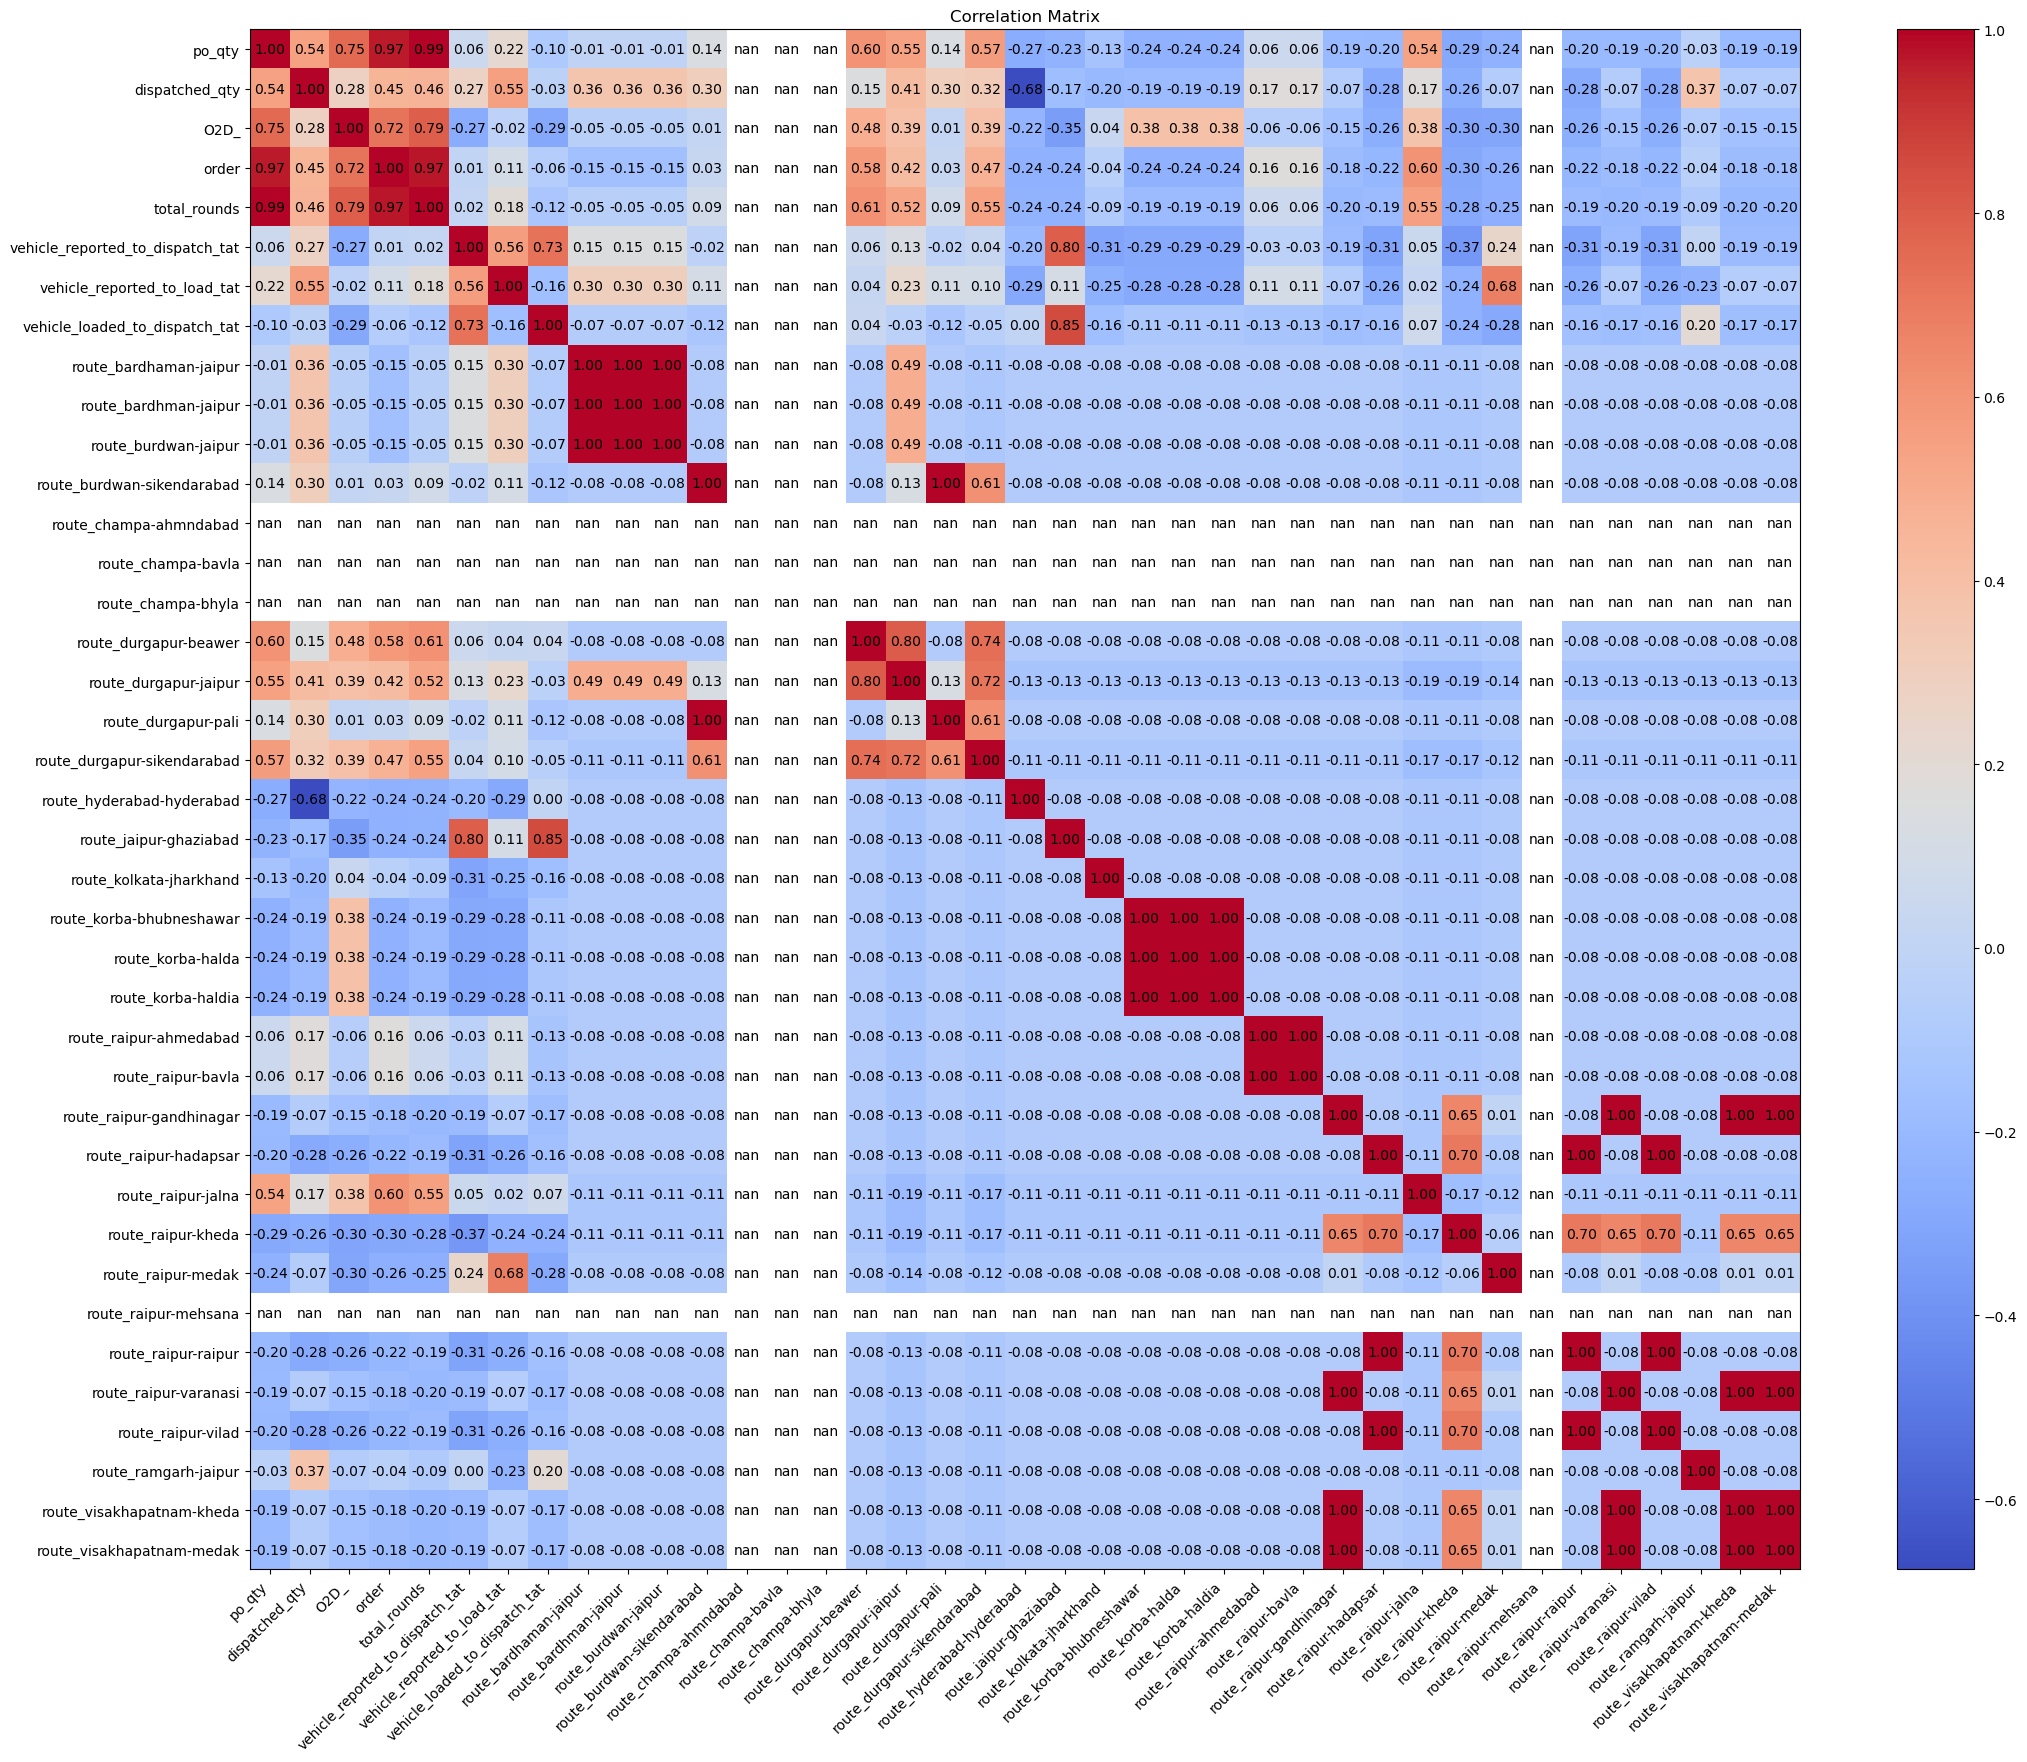

In [464]:


numeric_cols = df3.select_dtypes(include=['number']).columns
df4 = df3.groupby('seller_name')[numeric_cols].mean()


# Calculate the correlation matrix
correlation_matrix = df4.corr()

# Plotting the heatmap with correlation values
plt.figure(figsize=(25, 20))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Adding color bar
plt.colorbar(heatmap)

# Adding labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Adding correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

In [465]:
df4.columns

Index(['po_qty', 'dispatched_qty', 'O2D_', 'order', 'total_rounds',
       'vehicle_reported_to_dispatch_tat', 'vehicle_reported_to_load_tat',
       'vehicle_loaded_to_dispatch_tat', 'route_bardhaman-jaipur',
       'route_bardhman-jaipur', 'route_burdwan-jaipur',
       'route_burdwan-sikendarabad', 'route_champa-ahmndabad',
       'route_champa-bavla', 'route_champa-bhyla', 'route_durgapur-beawer',
       'route_durgapur-jaipur', 'route_durgapur-pali',
       'route_durgapur-sikendarabad', 'route_hyderabad-hyderabad',
       'route_jaipur-ghaziabad', 'route_kolkata-jharkhand',
       'route_korba-bhubneshawar', 'route_korba-halda', 'route_korba-haldia',
       'route_raipur-ahmedabad', 'route_raipur-bavla',
       'route_raipur-gandhinagar', 'route_raipur-hadapsar',
       'route_raipur-jalna', 'route_raipur-kheda', 'route_raipur-medak',
       'route_raipur-mehsana', 'route_raipur-raipur', 'route_raipur-varanasi',
       'route_raipur-vilad', 'route_ramgarh-jaipur',
       'route_v

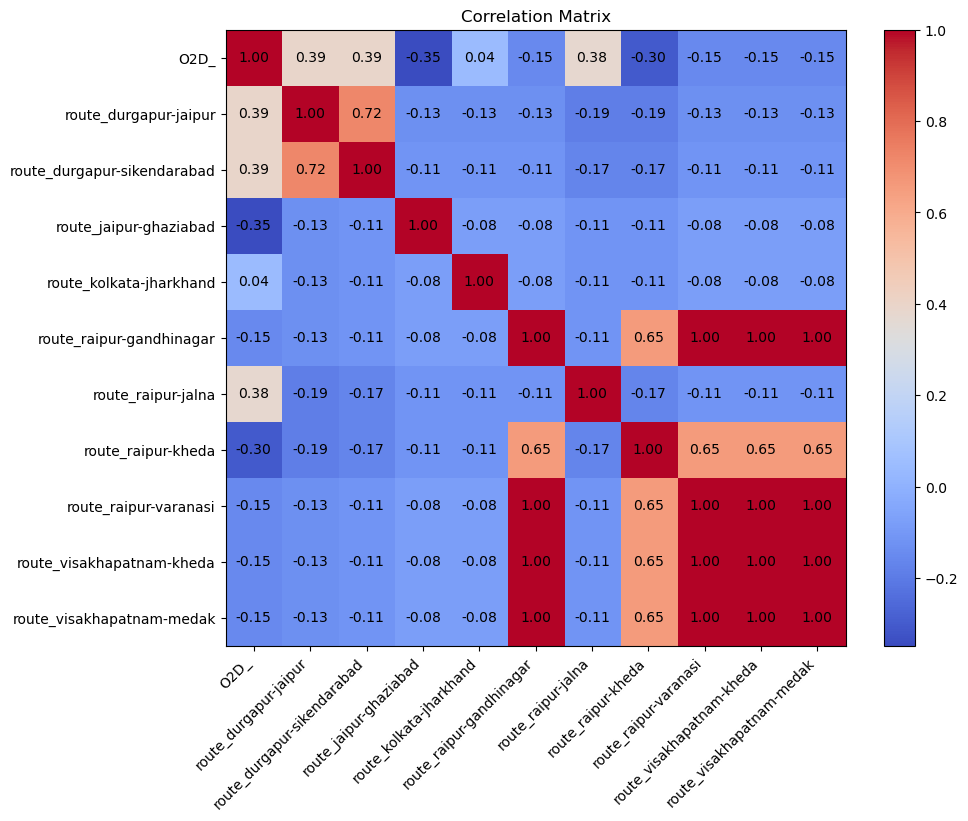

In [466]:

df5 = df4[['O2D_', 'route_durgapur-jaipur', 'route_durgapur-sikendarabad',
       'route_jaipur-ghaziabad', 'route_kolkata-jharkhand',
       'route_raipur-gandhinagar', 'route_raipur-jalna', 'route_raipur-kheda',
       'route_raipur-varanasi', 'route_visakhapatnam-kheda',
       'route_visakhapatnam-medak']]


# Calculate the correlation matrix
correlation_matrix = df5.corr()

# Plotting the heatmap with correlation values
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Adding color bar
plt.colorbar(heatmap)

# Adding labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Adding correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

In [467]:
index_columns = [
    'durgapur-jaipur',
    'durgapur-sikendarabad',
    'raipur-gandhinagar',
    'raipur-jalna',
    'raipur-kheda',
    'raipur-varanasi',
    'visakhapatnam-kheda',
    'visakhapatnam-medak'
]


route_df = df[df['route'].isin(index_columns)]
# Create the pivot table
pivot_table = route_df.pivot_table(
    columns = ['category','Month'],
    values=['O2D_'],
    index='route',
    aggfunc='mean'
).fillna(0).round(2)
pivot_table

O2D_                                         
category              RMC - Aluminium                  RMC - Steel            
Month                           April  July June   May       April  June   May
route                                                                         
durgapur-jaipur                  0.00  0.00  0.0  0.00       13.83  6.58  3.09
durgapur-sikendarabad            0.00  0.00  0.0  0.00       15.29  5.70  0.00
raipur-gandhinagar               1.99  0.00  0.0  1.00        0.00  0.00  0.00
raipur-jalna                     0.00  0.00  0.0  0.00       14.36  4.30  0.00
raipur-kheda                     6.00  0.44  0.0  3.93        0.00  0.00  0.00
raipur-varanasi                  2.00  0.00  0.0  0.00        0.00  0.00  0.00
visakhapatnam-kheda              0.00  0.00  0.0  5.00        0.00  0.00  0.00
visakhapatnam-medak              0.00  0.00  0.0  2.00        0.00  0.00  0.00

In [468]:
temp = df3.pivot_table(index = ['seller_name', 'category'], columns = 'Month', aggfunc = {'O2D_' : 'mean', 'vehicle_reported_to_dispatch_tat' : [ 'mean'], 'vehicle_reported_to_load_tat' : [ 'mean'], 'vehicle_loaded_to_dispatch_tat' : ['max', 'mean']}).fillna(0).round(2)
temp


O2D_              \
                                                           mean               
Month                                                     April  July  June   
seller_name                              category                             
ASAN STEELS PRIVATE LIMITED              RMC - Steel      14.36  0.00  0.00   
Bizongo Purchase                         RMC - Aluminium   0.00  0.58  2.00   
JAGDAMBA STEELS                          RMC - Aluminium   0.00  1.00  0.00   
JHARKHAND ISPAT PRIVATE LIMITED          RMC - Steel       0.00  0.00  4.33   
KANSAL METAL PRIVATE LIMITED             RMC - Aluminium   3.00  0.00  1.00   
MAAN ALUMINIUM LIMITED                   RMC - Aluminium   0.00  0.00  2.00   
NEPTUNE ISPAT PRIVATE LIMITED            RMC - Steel       0.00  4.99  5.74   
NUTAN ISPAT AND POWER PRIVATE LIMITED    RMC - Steel       0.00  0.00  4.49   
SHREESATYA STEEL & POWER PRIVATE LIMITED RMC - Steel       0.00  0.00  4.50   
SRI BALAHA CHEMICALS PRIVATE LIMITED     RMC - Aluminium   0.00  0.00  9.00   
SUMANGAL ISPAT PVT LTD                   RMC - Steel      14.79  0.00  0.00   
SUNIL SPONGE PRIVATE LIMITED             RMC - Steel       0.00  0.00  4.30   
SWARNAGIRI INSULATING COMPANY INDIA      RMC - Aluminium   0.00  0.00  0.00   
Tata International Limited               RMC - Aluminium   0.00  0.00  0.00   

                                                                \
                                                                 
Month                                                      May   
seller_name                              category                
ASAN STEELS PRIVATE LIMITED              RMC - Steel      0.00   
Bizongo Purchase                         RMC - Aluminium  0.00   
JAGDAMBA STEELS                          RMC - Aluminium  0.00   
JHARKHAND ISPAT PRIVATE LIMITED          RMC - Steel      0.00   
KANSAL METAL PRIVATE LIMITED             RMC - Aluminium  3.39   
MAAN ALUMINIUM LIMITED                   RMC - Aluminium  0.00   
NEPTUNE ISPAT PRIVATE LIMITED            RMC - Steel      0.00   
NUTAN ISPAT AND POWER PRIVATE LIMITED    RMC - Steel      0.00   
SHREESATYA STEEL & POWER PRIVATE LIMITED RMC - Steel      0.00   
SRI BALAHA CHEMICALS PRIVATE LIMITED     RMC - Aluminium  0.00   
SUMANGAL ISPAT PVT LTD                   RMC - Steel      3.07   
SUNIL SPONGE PRIVATE LIMITED             RMC - Steel      0.00   
SWARNAGIRI INSULATING COMPANY INDIA      RMC - Aluminium  6.06   
Tata International Limited               RMC - Aluminium  0.00   

                                                         vehicle_loaded_to_dispatch_tat  \
                                                                                    max   
Month                                                                             April   
seller_name                              category                                         
ASAN STEELS PRIVATE LIMITED              RMC - Steel                               0.83   
Bizongo Purchase                         RMC - Aluminium                           0.00   
JAGDAMBA STEELS                          RMC - Aluminium                           0.00   
JHARKHAND ISPAT PRIVATE LIMITED          RMC - Steel                               0.00   
KANSAL METAL PRIVATE LIMITED             RMC - Aluminium                           0.17   
MAAN ALUMINIUM LIMITED                   RMC - Aluminium                           0.00   
NEPTUNE ISPAT PRIVATE LIMITED            RMC - Steel                               0.00   
NUTAN ISPAT AND POWER PRIVATE LIMITED    RMC - Steel                               0.00   
SHREESATYA STEEL & POWER PRIVATE LIMITED RMC - Steel                               0.00   
SRI BALAHA CHEMICALS PRIVATE LIMITED     RMC - Aluminium                           0.00   
SUMANGAL ISPAT PVT LTD                   RMC - Steel                               0.62   
SUNIL SPONGE PRIVATE LIMITED             RMC - Steel                              

In [469]:
temp = df3.pivot_table(index = [ 'category'], columns = 'Month', aggfunc = {'po_qty' : 'mean', 'vehicle_reported_to_dispatch_tat' : [ 'mean'], 'vehicle_reported_to_load_tat' : [ 'mean'], 'vehicle_loaded_to_dispatch_tat' : [ 'mean']}).fillna(0).round(2)
temp

po_qty                        vehicle_loaded_to_dispatch_tat  \
                   mean                                                  mean   
Month             April   July    June     May                          April   
category                                                                        
RMC - Aluminium   40.50   59.0   23.57   55.45                           0.09   
RMC - Steel      470.31  126.0  231.31  151.25                           0.31   

                                  vehicle_reported_to_dispatch_tat        \
                                                              mean         
Month            July  June   May                            April  July   
category                                                                   
RMC - Aluminium  0.05  0.28  0.31                             0.22  0.38   
RMC - Steel      0.21  0.29  0.47                             0.78  0.88   

                            vehicle_reported_to_load_tat                    
                                                    mean                    
Month            June   May                        April  July  June   May  
category                                                                    
RMC - Aluminium  0.42  0.62                         0.13  0.34  0.14  0.31  
RMC - Steel      0.85  1.23                         0.50  0.59  0.56  0.76

In [470]:
### Does route also impact the O2D_ at seller level??

df3.pivot_table(index = ['seller_name', 'route', 'category'], columns = 'Month', aggfunc = {'O2D_' : 'mean', 'vehicle_reported_to_dispatch_tat' : ['max', 'mean'], 'vehicle_reported_to_load_tat' : ['max', 'mean'], 'vehicle_loaded_to_dispatch_tat' : ['max', 'mean']}).fillna(0).round(2)


O2D_  \
                                                                                 mean   
Month                                                                           April   
seller_name                              route                 category                 
ASAN STEELS PRIVATE LIMITED              raipur-jalna          RMC - Steel      14.36   
Bizongo Purchase                         raipur-hadapsar       RMC - Aluminium   0.00   
                                         raipur-kheda          RMC - Aluminium   0.00   
                                         raipur-raipur         RMC - Aluminium   0.00   
                                         raipur-vilad          RMC - Aluminium   0.00   
JAGDAMBA STEELS                          raipur-medak          RMC - Aluminium   0.00   
JHARKHAND ISPAT PRIVATE LIMITED          ramgarh-jaipur        RMC - Steel       0.00   
KANSAL METAL PRIVATE LIMITED             raipur-kheda          RMC - Aluminium   6.00   
                                         raipur-medak          RMC - Aluminium   0.00   
                                         raipur-gandhinagar    RMC - Aluminium   1.99   
                                         raipur-varanasi       RMC - Aluminium   2.00   
                                         visakhapatnam-kheda   RMC - Aluminium   0.00   
                                         visakhapatnam-medak   RMC - Aluminium   0.00   
MAAN ALUMINIUM LIMITED                   hyderabad-hyderabad   RMC - Aluminium   0.00   
NEPTUNE ISPAT PRIVATE LIMITED            burdwan-sikendarabad  RMC - Steel       0.00   
                                         durgapur-jaipur       RMC - Steel       0.00   
                                         durgapur-pali         RMC - Steel       0.00   
                                         durgapur-sikendarabad RMC - Steel       0.00   
NUTAN ISPAT AND POWER PRIVATE LIMITED    raipur-ahmedabad      RMC - Steel       0.00   
                                         raipur-bavla          RMC - Steel       0.00   
SHREESATYA STEEL & POWER PRIVATE LIMITED durgapur-jaipur       RMC - Steel       0.00   
                                         bardhman-jaipur       RMC - Steel       0.00   
                                         burdwan-jaipur        RMC - Steel       0.00   
SRI BALAHA CHEMICALS PRIVATE LIMITED     korba-bhubneshawar    RMC - Aluminium   0.00   
                                         korba-haldia          RMC - Aluminium   0.00   
SUMANGAL ISPAT PVT LTD                   durgapur-jaipur       RMC - Steel      13.83   
                                         durgapur-sikendarabad RMC - Steel      15.29   
                                         durgapur-beawer       RMC - Steel       0.00   
SUNIL SPONGE PRIVATE LIMITED             raipur-jalna          RMC - Steel       0.00   
SWARNAGIRI INSULATING COMPANY INDIA      kolkata-jharkhand     RMC - Aluminium   0.00   
Tata International Limited               jaipur-ghaziabad      RMC - Aluminium   0.00   

                                                                                      \
                                                                                       
Month                                                                           July   
seller_name                              route                 category                
ASAN STEELS PRIVATE LIMITED              raipur-jalna          RMC - Steel      0.00   
Bizongo Purchase                         raipur-hadapsar       RMC - Aluminium  0.00   
                                         raipur-kheda          RMC - Aluminium  0.44   
                                         raipur-raipur         RMC - Aluminium  0.00   
                                         raipur-vilad          RMC - Aluminium  1.00   
JAGDAMBA STEELS                          raipur-medak          RMC - Aluminium  1.00   
JHARKHAND ISPAT PRIVATE LIMITED          ramgarh-jaipur        RMC - Steel      0.00 

In [471]:
"""
Seems like vehicle reporting to load TAT is higher incase when the category is steel.

Q. Because of quality check?
Q. Because loading of steel takes time?

Q. Is the vehicle loaded after QC?

Q. If yes, then loading to dispatch is also high for Steel. Is it normal for steel?
Does it take around 10-12 hours to load steel?
"""

"""The TAT for vehicle reporting to dispatch is significantly higher for Steel than that of AL.
But the records are of April only. 

Still reporting to loading TAT is high for steel. Can be because loading takes time incase of steel."""

'The TAT for vehicle reporting to dispatch is significantly higher for Steel than that of AL.\nBut the records are of April only. \n\nStill reporting to loading TAT is high for steel. Can be because loading takes time incase of steel.'

In [472]:
df3.pivot_table(index = ['seller_name', 'category'],aggfunc = { 'vehicle_reported_to_dispatch_tat' : ['max', 'mean'], 'vehicle_reported_to_load_tat' : ['max', 'mean'], 'vehicle_loaded_to_dispatch_tat' : ['max', 'mean']}).fillna(0).round(2)


vehicle_loaded_to_dispatch_tat  \
                                                                                    max   
seller_name                              category                                         
ASAN STEELS PRIVATE LIMITED              RMC - Steel                               0.83   
Bizongo Purchase                         RMC - Aluminium                           0.95   
JAGDAMBA STEELS                          RMC - Aluminium                           0.01   
JHARKHAND ISPAT PRIVATE LIMITED          RMC - Steel                               0.96   
KANSAL METAL PRIVATE LIMITED             RMC - Aluminium                           0.23   
MAAN ALUMINIUM LIMITED                   RMC - Aluminium                           0.72   
NEPTUNE ISPAT PRIVATE LIMITED            RMC - Steel                               0.40   
NUTAN ISPAT AND POWER PRIVATE LIMITED    RMC - Steel                               0.38   
SHREESATYA STEEL & POWER PRIVATE LIMITED RMC - Steel                               0.99   
SRI BALAHA CHEMICALS PRIVATE LIMITED     RMC - Aluminium                           0.22   
SUMANGAL ISPAT PVT LTD                   RMC - Steel                               1.38   
SUNIL SPONGE PRIVATE LIMITED             RMC - Steel                               2.14   
SWARNAGIRI INSULATING COMPANY INDIA      RMC - Aluminium                           0.30   
Tata International Limited               RMC - Aluminium                           1.52   

                                                                \
                                                          mean   
seller_name                              category                
ASAN STEELS PRIVATE LIMITED              RMC - Steel      0.12   
Bizongo Purchase                         RMC - Aluminium  0.16   
JAGDAMBA STEELS                          RMC - Aluminium  0.01   
JHARKHAND ISPAT PRIVATE LIMITED          RMC - Steel      0.64   
KANSAL METAL PRIVATE LIMITED             RMC - Aluminium  0.14   
MAAN ALUMINIUM LIMITED                   RMC - Aluminium  0.38   
NEPTUNE ISPAT PRIVATE LIMITED            RMC - Steel      0.21   
NUTAN ISPAT AND POWER PRIVATE LIMITED    RMC - Steel      0.20   
SHREESATYA STEEL & POWER PRIVATE LIMITED RMC - Steel      0.28   
SRI BALAHA CHEMICALS PRIVATE LIMITED     RMC - Aluminium  0.22   
SUMANGAL ISPAT PVT LTD                   RMC - Steel      0.42   
SUNIL SPONGE PRIVATE LIMITED             RMC - Steel      0.75   
SWARNAGIRI INSULATING COMPANY INDIA      RMC - Aluminium  0.15   
Tata International Limited               RMC - Aluminium  1.52   

                                                         vehicle_reported_to_dispatch_tat  \
                                                                                      max   
seller_name                              category                                           
ASAN STEELS PRIVATE LIMITED              RMC - Steel                                 2.15   
Bizongo Purchase                         RMC - Aluminium                             0.95   
JAGDAMBA STEELS                          RMC - Aluminium                             1.19   
JHARKHAND ISPAT PRIVATE LIMITED          RMC - Steel                                 1.10   
KANSAL METAL PRIVATE LIMITED             RMC - Aluminium                             1.41   
MAAN ALUMINIUM LIMITED                   RMC - Aluminium                             0.79   
NEPTUNE ISPAT PRIVATE LIMITED            RMC - Steel                                 0.88   
NUTAN ISPAT AND POWER PRIVATE LIMITED    RMC - Steel                                 1.24   
SHREESATYA STEEL & POWER PRIVATE LIMITED RMC - Steel                                 1.44   
SRI BALAHA CHEMICALS PRIVATE LIMITED     RMC - Aluminium                             0.31   
SUMANGAL ISPAT PVT LTD                   RMC - Steel                                 1.75   
SUNIL SPONGE PRIVATE LIMITED             RMC - Steel                                

In [473]:
"""
There are 3 aspects of looking at O2D at Seller Level:

1. Only on Seller level : 
METRIC : Vehicle reporting to Dispatch TAT

-> Already seen above. The steel category takes more time. 


"""

'\nThere are 3 aspects of looking at O2D at Seller Level:\n\n1. Only on Seller level : \nMETRIC : Vehicle reporting to Dispatch TAT\n\n-> Already seen above. The steel category takes more time. \n\n\n'

In [474]:
"""

Vehicle report to load is very high for certain lanes

"""
Attach the correlation screen shot and then the frequency of orders.
Category wise


List down the TAT's where o2d is high for steel or aluminium

SyntaxError: unterminated string literal (detected at line 10) (2054205480.py, line 10)

In [475]:
df['po_ts'].max()

Timestamp('2024-07-04 08:31:02')

In [476]:
df.groupby(['route', 'category'])[['po_qty', 'O2D_']].mean().sort_values(by = ['O2D_', 'po_qty'], ascending = False)

,,po_qty,O2D_
route,category,,
korba-halda,RMC - Aluminium,25.000000,16.000000
korba-haldia,RMC - Aluminium,25.000000,16.000000
durgapur-sikendarabad,RMC - Steel,445.714286,13.100033
raipur-jalna,RMC - Steel,384.827586,12.275472
durgapur-jaipur,RMC - Steel,343.520000,9.663377
kolkata-jharkhand,RMC - Aluminium,75.000000,6.055620
burdwan-jaipur,RMC - Steel,200.000000,5.664967
bardhaman-jaipur,RMC - Steel,126.000000,5.664967
visakhapatnam-kheda,RMC - Aluminium,40.000000,5.000000


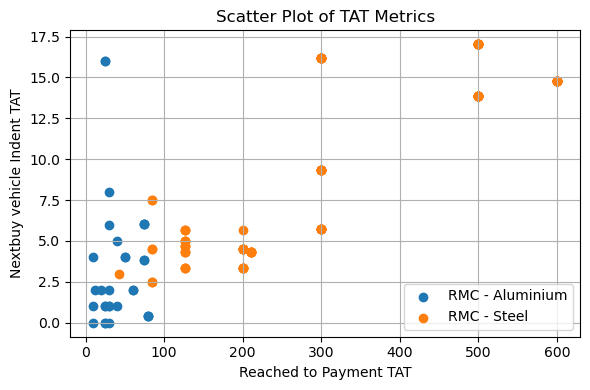

In [477]:
# colors = {'RMC - Alu': 'blue', 'Category B': 'red'}

# Plotting
plt.figure(figsize=(6, 4))

for category in df['category'].unique():
    plt.scatter(df[df['category'] == category]['po_qty'],
                df[df['category'] == category]['O2D_'],
                
                label=category)

plt.title('Scatter Plot of TAT Metrics')
plt.xlabel('Reached to Payment TAT')
plt.ylabel('Nextbuy vehicle Indent TAT')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

In [478]:
df3.pivot_table(index = ['Month', 'category'],aggfunc = { 'vehicle_reported_to_dispatch_tat' : [ 'mean'], 'vehicle_reported_to_load_tat' : [ 'mean'], 'vehicle_loaded_to_dispatch_tat' : ['mean'],'O2D_' : 'mean', 'po_qty' : 'mean'}).fillna(0).round(2).T


Month                                           April              \
category                              RMC - Aluminium RMC - Steel   
O2D_                             mean            3.00       14.64   
po_qty                           mean           40.50      470.31   
vehicle_loaded_to_dispatch_tat   mean            0.09        0.31   
vehicle_reported_to_dispatch_tat mean            0.22        0.78   
vehicle_reported_to_load_tat     mean            0.13        0.50   

Month                                            July              \
category                              RMC - Aluminium RMC - Steel   
O2D_                             mean            0.67        4.99   
po_qty                           mean           59.00      126.00   
vehicle_loaded_to_dispatch_tat   mean            0.05        0.21   
vehicle_reported_to_dispatch_tat mean            0.38        0.88   
vehicle_reported_to_load_tat     mean            0.34        0.59   

Month                                            June              \
category                              RMC - Aluminium RMC - Steel   
O2D_                             mean            3.30        4.90   
po_qty                           mean           23.57      231.31   
vehicle_loaded_to_dispatch_tat   mean            0.28        0.29   
vehicle_reported_to_dispatch_tat mean            0.42        0.85   
vehicle_reported_to_load_tat     mean            0.14        0.56   

Month                                             May              
category                              RMC - Aluminium RMC - Steel  
O2D_                             mean            3.81        3.07  
po_qty                           mean           55.45      151.25  
vehicle_loaded_to_dispatch_tat   mean            0.31        0.47  
vehicle_reported_to_dispatch_tat mean            0.62        1.23  
vehicle_reported_to_load_tat     mean            0.31        0.76

In [479]:
june = df3[df3['Month'] == 'June']
May = df3[df3['Month'] == 'May']


In [480]:
numeric_cols = june.select_dtypes(include=[np.number]).columns
june[june[numeric_cols]<0] = 0
june.groupby('category')[['vehicle_loaded_to_dispatch_tat', 'vehicle_reported_to_dispatch_tat', 
                          'vehicle_reported_to_dispatch_tat', 'O2D_', 'po_qty']].mean().T

/tmp/ipykernel_87702/906925393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june[june[numeric_cols]<0] = 0
/tmp/ipykernel_87702/906925393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june[june[numeric_cols]<0] = 0


category,RMC - Aluminium,RMC - Steel
vehicle_loaded_to_dispatch_tat,0.283226,0.308203
vehicle_reported_to_dispatch_tat,0.419231,0.846455
vehicle_reported_to_dispatch_tat,0.419231,0.846455
O2D_,3.300000,4.897525
po_qty,23.571429,231.306122


In [481]:
numeric_cols = june.select_dtypes(include=[np.number]).columns
May[May[numeric_cols]<0] = 0
june.groupby('category')[['vehicle_loaded_to_dispatch_tat', 'vehicle_reported_to_dispatch_tat', 
                          'vehicle_reported_to_dispatch_tat', 'O2D_', 'po_qty']].mean().T

/tmp/ipykernel_87702/2230142622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  May[May[numeric_cols]<0] = 0
/tmp/ipykernel_87702/2230142622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  May[May[numeric_cols]<0] = 0


category,RMC - Aluminium,RMC - Steel
vehicle_loaded_to_dispatch_tat,0.283226,0.308203
vehicle_reported_to_dispatch_tat,0.419231,0.846455
vehicle_reported_to_dispatch_tat,0.419231,0.846455
O2D_,3.300000,4.897525
po_qty,23.571429,231.306122


In [482]:
df4 = df3[df3['Month'] != 'April']
numeric_cols = june.select_dtypes(include=[np.number]).columns
df4[df4[numeric_cols]<0] = 0
df4.groupby(['category', 'Month'])[['vehicle_loaded_to_dispatch_tat', 'vehicle_reported_to_dispatch_tat', 
                          'vehicle_reported_to_dispatch_tat', 'O2D_', 'po_qty']].mean().T

/tmp/ipykernel_87702/3762887428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[df4[numeric_cols]<0] = 0
/tmp/ipykernel_87702/3762887428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[df4[numeric_cols]<0] = 0


category                         RMC - Aluminium                        \
Month                                       July       June        May   
vehicle_loaded_to_dispatch_tat          0.045556   0.283226   0.313194   
vehicle_reported_to_dispatch_tat        0.384306   0.419231   0.620370   
vehicle_reported_to_dispatch_tat        0.384306   0.419231   0.620370   
O2D_                                    0.665051   3.300000   3.809377   
po_qty                                 59.000000  23.571429  55.454545   

category                         RMC - Steel                          
Month                                   July        June         May  
vehicle_loaded_to_dispatch_tat      0.208333    0.308203    0.564497  
vehicle_reported_to_dispatch_tat    0.875000    0.846455    1.242188  
vehicle_reported_to_dispatch_tat    0.875000    0.846455    1.242188  
O2D_                                4.991320    4.897525    3.074483  
po_qty                            126.000000  231.306122  151.250000

In [483]:
mean_o2d = df3.groupby('po_number')['O2D_'].mean().reset_index()

good_po = df3[df3['O2D_']<=6]['po_number']
bad_po = df3[df3['O2D_']>6]['po_number']


good_df = df3[df3['po_number'].isin(good_po)]
bad_df = df3[df3['po_number'].isin(bad_po)]


numeric_cols = good_df.select_dtypes(include=[np.number]).columns
good_df[good_df[numeric_cols]<0] = 0
good_df.groupby('category')[['vehicle_loaded_to_dispatch_tat', 'vehicle_reported_to_dispatch_tat', 
                          'vehicle_reported_to_dispatch_tat', 'O2D_', 'po_qty']].mean().T



/tmp/ipykernel_87702/1444668524.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df[good_df[numeric_cols]<0] = 0
/tmp/ipykernel_87702/1444668524.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df[good_df[numeric_cols]<0] = 0


category,RMC - Aluminium,RMC - Steel
vehicle_loaded_to_dispatch_tat,0.227025,0.392124
vehicle_reported_to_dispatch_tat,0.499392,0.901152
vehicle_reported_to_dispatch_tat,0.499392,0.901152
O2D_,1.921854,4.501006
po_qty,40.080000,181.043478


In [484]:
numeric_cols = bad_df.select_dtypes(include=[np.number]).columns
bad_df[bad_df[numeric_cols]<0] = 0
bad_df.groupby('category')[['vehicle_loaded_to_dispatch_tat', 'vehicle_reported_to_dispatch_tat', 
                          'vehicle_reported_to_dispatch_tat', 'O2D_', 'po_qty']].mean().T



/tmp/ipykernel_87702/1047666166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_df[bad_df[numeric_cols]<0] = 0
/tmp/ipykernel_87702/1047666166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_df[bad_df[numeric_cols]<0] = 0


category,RMC - Aluminium,RMC - Steel
vehicle_loaded_to_dispatch_tat,0.128704,0.304502
vehicle_reported_to_dispatch_tat,0.264352,0.777203
vehicle_reported_to_dispatch_tat,0.264352,0.777203
O2D_,9.694477,14.420105
po_qty,50.833333,458.606061


## does seller has manufacturing limitation?

Hypothesis : Seller has limited goods available but they still claim to have goods ready.

Q. How to identify?
-> Analyzing the pattern of time taken for each truck form reaching the origin to dispatch.

In [485]:
df.head()

,sno,date,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,dispatch_to_delivery_tat,unloading_tat,vehicle_level_o2d,buyer_name,seller_name,seller_po_number,transporter_type,order_type,order_completion_percentage,O2D_,O2D_Bucket,Month,total_rounds,route_bardhaman-jaipur,route_bardhman-jaipur,route_burdwan-jaipur,route_burdwan-sikendarabad,route_champa-ahmndabad,route_champa-bavla,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_korba-halda,route_korba-haldia,route_raipur-ahmedabad,route_raipur-bavla,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_raipur-vilad,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route,order
0,152,2024-07-04,PO/25/CG/18,30.0,2024-07-04,RMC - Aluminium,NaN,Raipur,Medak,NaN,2024-07-04 08:31:02,07/04/2024 11:31:02,07/04/2024 11:31:02,07/04/2024 11:31:02,07/04/2024 11:31:02,07/04/2024 11:31:02,2024-07-04 12:31:02,2024-07-04 13:45:00,2024-07-05 18:10:00,2024-07-05 18:20:00,NaN,NaN,NaN,0.125012,0.000012,0.000012,0.093044,1.190984,0.051354,0.000012,2.236111,0.000000,NaN,Sagar Asia Private Limited,JAGDAMBA STEELS,PO/25/CG/18,Bizongo,S2B,98.416667,1.000000,0-3 days,July,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,raipur-medak,1.0
1,53,2024-04-16,PO/25/HA/111,600.0,2024-04-16,RMC - Steel,31.139999,Durgapur,Sikendarabad,May 1 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,05/02/2024 18:00:00,2024-05-03 04:00:00,2024-05-03 04:00:00,2024-05-03 10:46:00,2024-05-03 22:00:00,05/07/2024 6:00:00,NaN,05/09/2024 19:00:00,0.936412,0.000012,15.067373,0.416678,0.750012,-0.000012,0.747928,3.333345,2.541678,17.170401,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Bizongo,S2B,100.000000,14.759483,6+ days,April,17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,10.0
2,5,2024-04-16,PO/25/HA/111,600.0,2024-04-16,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,4/22/2024 11:00:00,2024-04-19 23:59:59,NaT,NaT,2024-04-24 22:15:00,4/26/2024 23:00:00,04/27/2024 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,2.031262,1.666678,8.180850,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Bizongo,S2B,100.000000,14.759483,6+ days,April,17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,NaN
3,37,2024-04-16,PO/25/HA/111,600.0,2024-04-16,RMC - Steel,30.000000,Durgapur,Sikendarabad,April 4 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/24/2024 7:31:00,2024-04-19 23:59:59,2024-04-24 04:00:00,2024-04-24 14:25:00,NaT,04/26/24 11:00:00,04/27/24 14:14:00,04/27/24 16:00:00,0.936412,0.000012,6.630567,-0.146516,0.750012,4.166667,0.747928,1.541678,1.208345,8.170430,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Bizongo,S2B,100.000000,14.759483,6+ days,April,17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,1.0
4,38,2024-04-16,PO/25/HA/111,600.0,2024-04-16,RMC - Steel,33.7

In [486]:
# df['vehicle_dispatched_ts'] = pd.to_datetime(df['vehicle_dispatched_ts'])
# df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'])

# df = df.sort_values(by=['po_number', 'order'])
# unique_po = df['po_number'].unique()

# df['#vehicle_before_unloading'] = 0
# df['qty_before_unloading'] = 0

# df_temp = pd.DataFrame()

# for po_number in unique_po:
#     temp = df[df['po_number'] == po_number].copy()
#     for i in range(len(temp)):
#         count = 0
#         # qty = temp.iloc[i]['dispatched_qty']
#         qty = 0
#         for j in range(i + 1, len(temp)):
#             if temp.iloc[i]['vehicle_unloaded_ts'] >= temp.iloc[j]['vehicle_dispatched_ts']:
#                 count += 1
#                 qty += temp.iloc[j]['dispatched_qty']
#         temp.at[temp.index[i], '#vehicle_before_unloading'] = count
#         temp.at[temp.index[i], 'qty_before_unloading'] = qty
#     df_temp = pd.concat([df_temp, temp])


# df_temp['qty_reached_till_now'] = df_temp.groupby('po_number')['dispatched_qty'].cumsum()

# df_temp.reset_index(drop=True, inplace=True)

In [487]:
df[df['po_number'] == 'PO/25/MH/631']

,sno,date,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,dispatch_to_delivery_tat,unloading_tat,vehicle_level_o2d,buyer_name,seller_name,seller_po_number,transporter_type,order_type,order_completion_percentage,O2D_,O2D_Bucket,Month,total_rounds,route_bardhaman-jaipur,route_bardhman-jaipur,route_burdwan-jaipur,route_burdwan-sikendarabad,route_champa-ahmndabad,route_champa-bavla,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_korba-halda,route_korba-haldia,route_raipur-ahmedabad,route_raipur-bavla,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_raipur-vilad,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route,order
110,149,2024-06-27,PO/25/MH/631,500.0,2024-06-27,RMC - Steel,36.070000,Champa,Bhyla,July 1 Week,2024-06-27 18:11:00,06/27/2024 18:11:00,06/28/2024 11:00:00,06/28/2024 11:00:00,06/28/2024 12:00:00,07/01/2024 13:46:00,2024-06-28 18:00:00,2024-07-02 12:51:00,2024-07-02 20:52:00,2024-07-03 15:00:00,07/06/2024 12:30:00,NaN,07/06/2024 15:00:00,0.000012,0.700706,3.115289,0.961817,1.089595,3.785405,0.700706,2.895845,0.104178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,champa-bhyla,2.0
111,150,2024-06-27,PO/25/MH/631,500.0,2024-06-27,RMC - Steel,NaN,Champa,Bhyla,NaN,2024-06-27 18:11:00,06/27/2024 18:11:00,06/28/2024 11:00:00,06/28/2024 11:00:00,06/28/2024 12:00:00,07/03/2024 13:35:00,2024-06-28 18:00:00,2024-07-03 14:25:00,NaT,NaT,NaN,NaN,NaN,0.000012,0.700706,5.107650,0.034734,4.399306,4.850683,0.700706,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,champa-bhyla,3.0
112,157,2024-06-27,PO/25/MH/631,500.0,2024-06-27,RMC - Steel,30.450001,Champa,Bavla,July 1 Week,2024-06-27 18:11:00,06/27/2024 18:11:00,06/28/2024 11:00:00,06/28/2024 11:00:00,06/28/2024 12:00:00,07/03/2024 15:30:00,2024-06-28 18:00:00,2024-07-03 21:30:00,2024-07-04 10:40:00,2024-07-04 15:30:00,NaN,NaN,NaN,0.000012,0.700706,5.187512,0.250012,0.750012,5.145822,0.700706,3.354167,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,champa-bavla,4.0
113,140,2024-06-27,PO/25/MH/631,500.0,2024-06-27,RMC - Steel,29.889999,Champa,Bhyla,July 1 Week,2024-06-27 18:11:00,06/27/2024 18:11:00,06/28/2024 11:00:00,06/28/2024 11:00:00,06/28/2024 12:00:00,06/29/2024 15:33:00,2024-06-29 18:00:00,2024-06-29 20:49:00,2024-06-30 10:52:00,2024-06-30 18:30:00,07/06/2024 12:29:00,NaN,07/06/2024 14:30:00,0.000012,0.700706,1.189595,0.219456,0.903484,0.117350,0.700706,5.749317,0.084039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,champa-bhyla,1.0
114,164,2024-06-27,PO/25/MH/631,500.0,2024-06-27,RMC - Steel,29.480000,Champa,Bhyla,July 1 Week,2024-06-27 18:11:00,06/27/2024 18:11:00,06/28/2024 11:00:00,06/28/2024 11:00:00,06/28/2024 12:00:00,07/04/2024 15:04:00,2024-06-29 18:00:00,2024-07-04 19:05:00,2024-07-06 14:10:00,2024-07-05 17:05:00,NaN,NaN,NaN,0.000012,0.700706,6.169456,0.167373,0.916678,5.045127,0.700706,2.288194,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June,7,0,0,0,0,0

In [488]:
non_april[(non_april['order'] == 6) & (non_april['category'] == 'RMC - Steel')& (non_april['Month'] == 'June')]

,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reported_ts,vehicle_loaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,vehicle_reported_to_dispatch_tat,vehicle_reported_to_load_tat,vehicle_loaded_to_dispatch_tat,route_bardhman-jaipur,route_burdwan-jaipur,route_burdwan-sikendarabad,route_champa-ahmndabad,route_champa-bavla,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_raipur-ahmedabad,route_raipur-bavla,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-hyderabad,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route
108,PO/25/MH/631,500.0,2024-06-27 18:11:00,RMC - Steel,41.830002,Champa,Bhyla,NaN,2024-07-06 17:00:00,2024-07-06 16:00:00,2024-07-06 16:30:00,NaN,NaN,6.0,June,6,07/06/2024 15:00:00,0.041667,0.020833,0.020833,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,champa-bhyla
118,PO/25/MH/654,200.0,2024-06-29 13:29:00,RMC - Steel,34.980000,Raipur,Ahmedabad,4.491726,2024-07-04 21:50:00,2024-07-04 13:30:00,2024-07-04 19:45:00,VMS TMT LIMITED,NUTAN ISPAT AND POWER PRIVATE LIMITED,6.0,June,6,07/04/2024 11:55:00,0.347222,0.260417,0.086806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,raipur-ahmedabad


In [489]:
df3.pivot_table(index = 'order', columns = ['category', 'Month'], aggfunc = {'vehicle_reported_to_dispatch_tat':'mean', 'vehicle_reported_to_load_tat':'mean', }).round(2)


vehicle_reported_to_dispatch_tat                                      \
category                  RMC - Aluminium                   RMC - Steel         
Month                               April  July  June   May       April  July   
order                                                                           
1.0                                  0.21  0.38  0.43  0.92        1.11  0.88   
2.0                                  0.25  0.42  0.27  0.32        1.21   NaN   
3.0                                   NaN   NaN   NaN  0.02        0.74   NaN   
4.0                                   NaN   NaN   NaN   NaN        0.71   NaN   
5.0                                   NaN   NaN   NaN   NaN        0.55   NaN   
6.0                                   NaN   NaN   NaN   NaN        0.84   NaN   
7.0                                   NaN   NaN   NaN   NaN        0.56   NaN   
8.0                                   NaN   NaN   NaN   NaN        0.54   NaN   
9.0                                   NaN   NaN   NaN   NaN        0.55   NaN   
10.0                                  NaN   NaN   NaN   NaN        0.57   NaN   
11.0                                  NaN   NaN   NaN   NaN        0.87   NaN   
12.0                                  NaN   NaN   NaN   NaN        0.89   NaN   
13.0                                  NaN   NaN   NaN   NaN        0.70   NaN   

                     vehicle_reported_to_load_tat                    \
category                          RMC - Aluminium                     
Month     June   May                        April  July  June   May   
order                                                                 
1.0       0.80  1.38                         0.11  0.36  0.13  0.47   
2.0       0.88  0.79                         0.18  0.27  0.18  0.13   
3.0       0.75  1.31                          NaN   NaN   NaN  0.01   
4.0       0.84   NaN                          NaN   NaN   NaN   NaN   
5.0       0.62   NaN                          NaN   NaN   NaN   NaN   
6.0       1.76   NaN                          NaN   NaN   NaN   NaN   
7.0       0.04   NaN                          NaN   NaN   NaN   NaN   
8.0        NaN   NaN                          NaN   NaN   NaN   NaN   
9.0        NaN   NaN                          NaN   NaN   NaN   NaN   
10.0       NaN   NaN                          NaN   NaN   NaN   NaN   
11.0       NaN   NaN                          NaN   NaN   NaN   NaN   
12.0       NaN   NaN                          NaN   NaN   NaN   NaN   
13.0       NaN   NaN                          NaN   NaN   NaN   NaN   

                                        
category RMC - Steel                    
Month          April  July  June   May  
order                                   
1.0             0.69  0.67  0.50  0.63  
2.0             1.18  0.67  0.60  0.91  
3.0             0.48  0.44  0.47  1.10  
4.0             0.47   NaN  0.59   NaN  
5.0             0.18   NaN  0.66   NaN  
6.0             0.35   NaN  0.85   NaN  
7.0             0.32   NaN  0.02   NaN  
8.0             0.52   NaN   NaN   NaN  
9.0             0.27   NaN   NaN   NaN  
10.0            0.37   NaN   NaN   NaN  
11.0            0.57   NaN   NaN   NaN  
12.0            0.54   NaN   NaN   NaN  
13.0            0.22   NaN   NaN   NaN

In [538]:
non_april = df3[df3['Month'] != 'April']
non_april.pivot_table(index = 'order', columns = ['category', 'Month'], aggfunc = {'vehicle_reported_to_dispatch_tat':'mean', 'vehicle_reported_to_load_tat':'mean', }).round(2)


vehicle_reported_to_dispatch_tat                                      \
category                  RMC - Aluminium             RMC - Steel               
Month                                July  June   May        July  June   May   
order                                                                           
1.0                                 -0.77 -0.65  0.32        0.24  0.08  1.26   
2.0                                 -0.69 -0.98 -0.87         NaN  0.25  0.07   
3.0                                   NaN   NaN -1.48         NaN -0.02  1.11   
4.0                                   NaN   NaN   NaN         NaN  0.17   NaN   
5.0                                   NaN   NaN   NaN         NaN -0.28   NaN   
6.0                                   NaN   NaN   NaN         NaN  2.01   NaN   
7.0                                   NaN   NaN   NaN         NaN -1.44   NaN   

         vehicle_reported_to_load_tat                                      
category              RMC - Aluminium             RMC - Steel              
Month                            July  June   May        July  June   May  
order                                                                      
1.0                             -0.25 -0.75  0.00        0.44  0.06  0.35  
2.0                             -0.45 -0.66 -0.75        0.44  0.29  0.97  
3.0                               NaN   NaN -1.02       -0.07 -0.00  1.41  
4.0                               NaN   NaN   NaN         NaN  0.27   NaN  
5.0                               NaN   NaN   NaN         NaN  0.43   NaN  
6.0                               NaN   NaN   NaN         NaN  0.85   NaN  
7.0                               NaN   NaN   NaN         NaN -1.00   NaN

/tmp/ipykernel_87702/2744921240.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_non_april[columns_to_scale] = scaler.fit_transform(st_non_april[columns_to_scale])


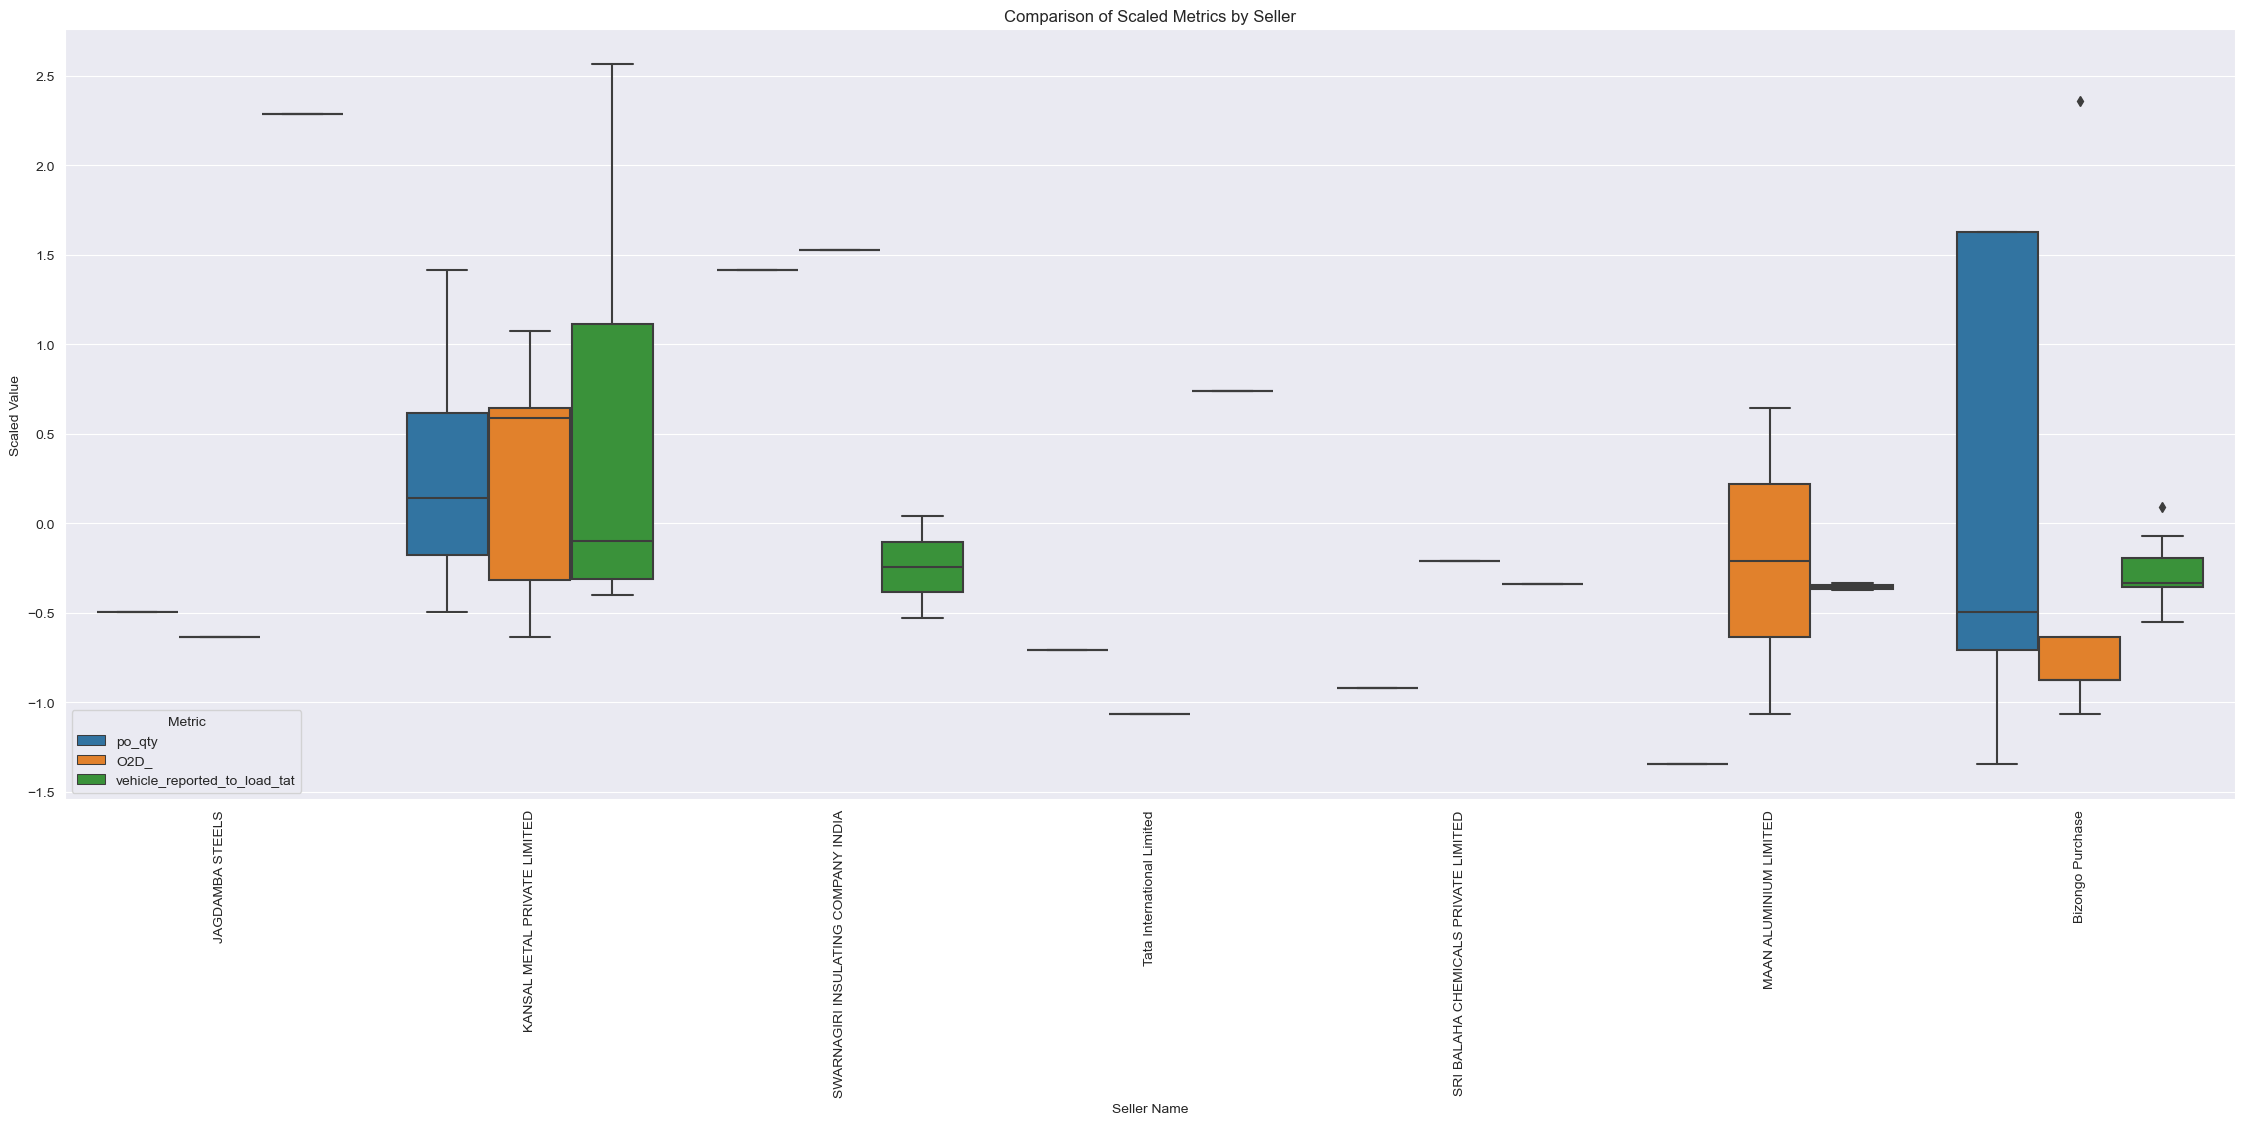

In [540]:
from sklearn.preprocessing import StandardScaler

non_april = df3[df3['Month'] != 'April']
st_non_april = non_april[non_april['category'] != 'RMC - Steel']
columns_to_scale = ['po_qty','O2D_', 'vehicle_reported_to_load_tat']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
st_non_april[columns_to_scale] = scaler.fit_transform(st_non_april[columns_to_scale])

# Reshape the DataFrame to long format
df_melted = pd.melt(st_non_april, id_vars=['seller_name'], 
                    value_vars=columns_to_scale,
                    var_name='Metric', value_name='Value')

# Create a boxplot
plt.figure(figsize=(28, 10))
sns.boxplot(x='seller_name', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Comparison of Scaled Metrics by Seller')
plt.xlabel('Seller Name')
plt.ylabel('Scaled Value')
plt.xticks(rotation=90)
# plt.grids()

# Show plot
plt.legend(title='Metric')
plt.show()

/tmp/ipykernel_87702/952899806.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_april[columns_to_scale] = scaler.fit_transform(non_april[columns_to_scale])


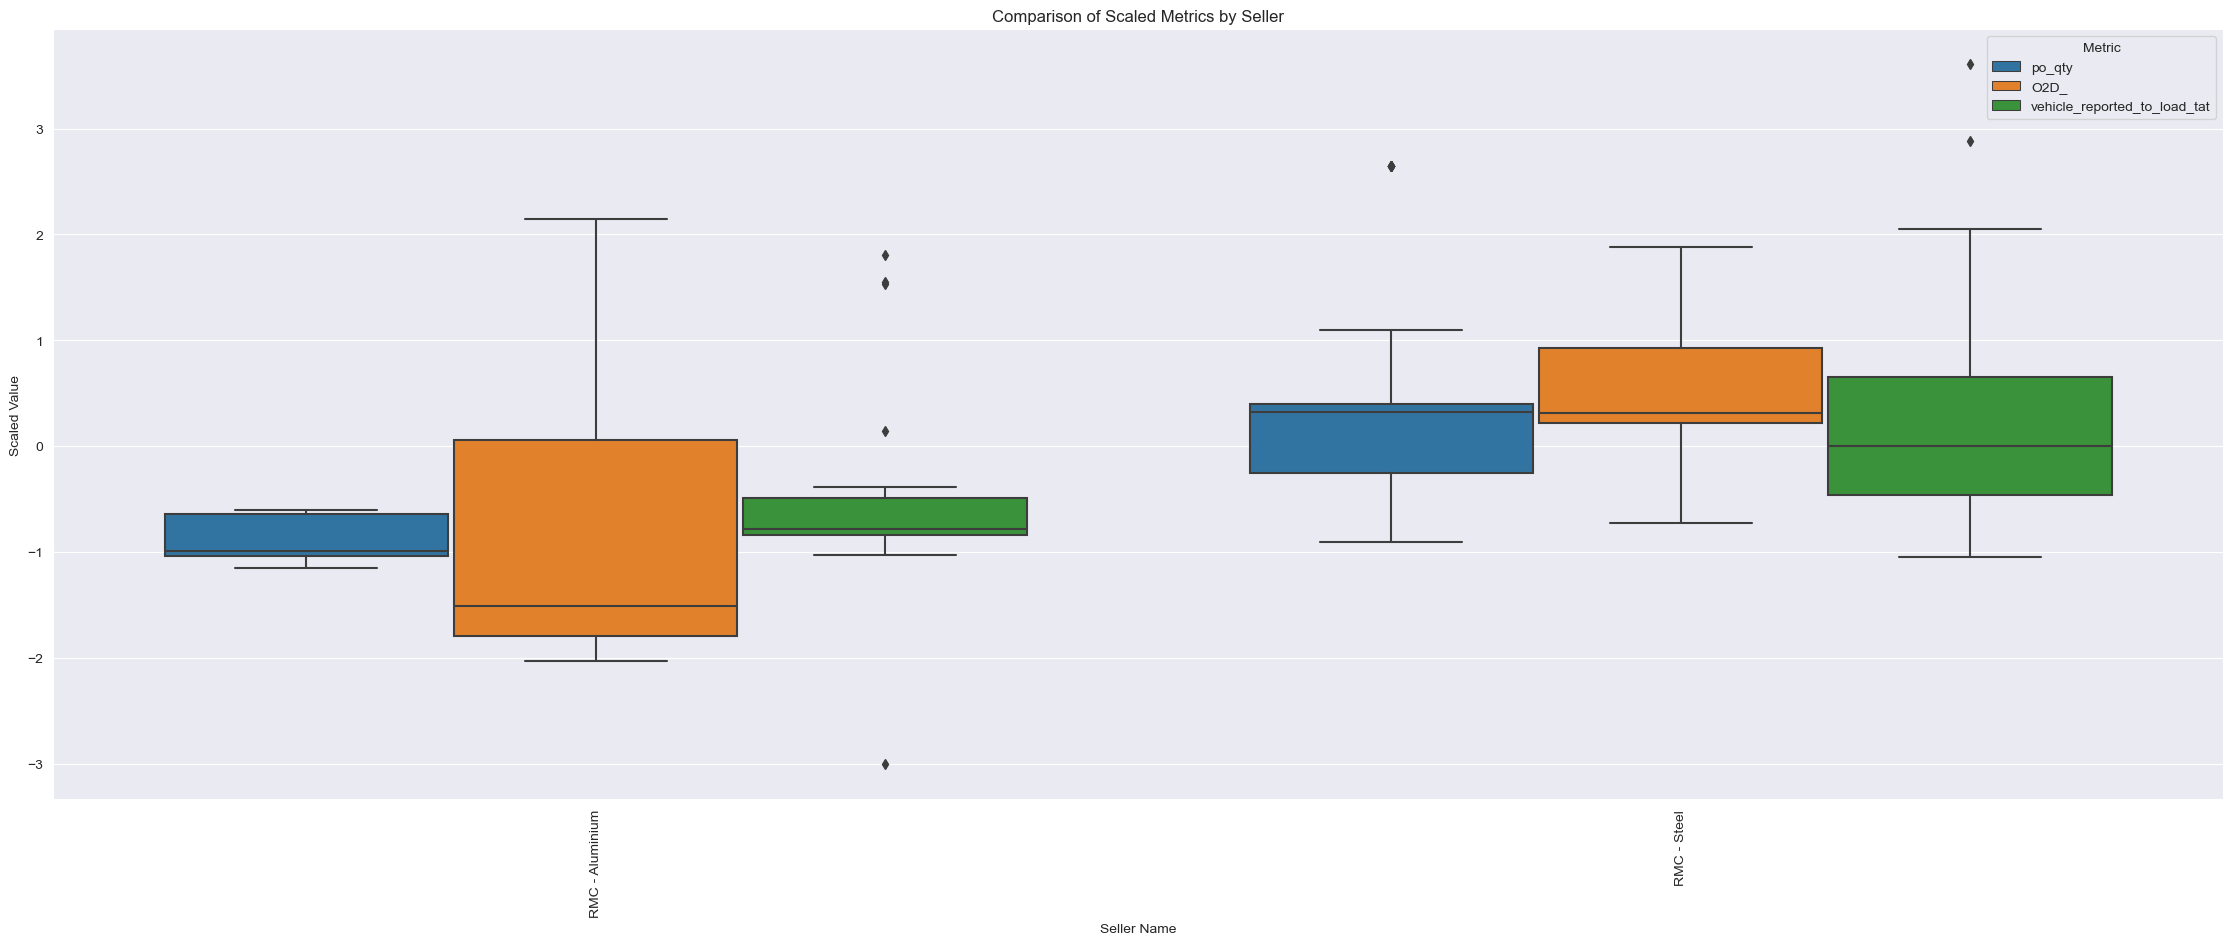

In [543]:
from sklearn.preprocessing import StandardScaler

non_april = df3[df3['Month'] != 'April']
columns_to_scale = ['po_qty','O2D_', 'vehicle_reported_to_load_tat']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
non_april[columns_to_scale] = scaler.fit_transform(non_april[columns_to_scale])

# Reshape the DataFrame to long format
df_melted = pd.melt(non_april, id_vars=['category'], 
                    value_vars=columns_to_scale,
                    var_name='Metric', value_name='Value')

# Create a boxplot
plt.figure(figsize=(28, 10))
sns.boxplot(x='category', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Comparison of Scaled Metrics by Seller')
plt.xlabel('Seller Name')
plt.ylabel('Scaled Value')
plt.xticks(rotation=90)
# plt.grids()

# Show plot
plt.legend(title='Metric')
plt.show()

In [491]:
non_april[(non_april['order'] == 3) & (non_april['category'] == 'RMC - Steel')& (non_april['Month'] == 'May')]

,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reported_ts,vehicle_loaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,vehicle_reported_to_dispatch_tat,vehicle_reported_to_load_tat,vehicle_loaded_to_dispatch_tat,route_bardhaman-jaipur,route_bardhman-jaipur,route_burdwan-jaipur,route_burdwan-sikendarabad,route_champa-ahmndabad,route_champa-bavla,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_korba-halda,route_korba-haldia,route_raipur-ahmedabad,route_raipur-bavla,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_raipur-vilad,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route
46,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,31.48,Durgapur,Jaipur,3.319173,2024-05-13 17:00:00,2024-05-12 09:30:00,2024-05-13 12:00:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,3.0,May,5,05/12/2024 7:30:00,1.3125,1.104167,0.208333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur


In [492]:
df3[df3['po_number'] == 'PO/25/HA/341']

,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reported_ts,vehicle_loaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,vehicle_reported_to_dispatch_tat,vehicle_reported_to_load_tat,vehicle_loaded_to_dispatch_tat,route_bardhaman-jaipur,route_bardhman-jaipur,route_burdwan-jaipur,route_burdwan-sikendarabad,route_champa-ahmndabad,route_champa-bavla,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_korba-halda,route_korba-haldia,route_raipur-ahmedabad,route_raipur-bavla,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_raipur-vilad,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route
42,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.650002,Durgapur,Jaipur,3.319173,2024-05-11 22:00:00,2024-05-10 04:00:00,2024-05-10 13:00:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,1.0,May,5,05/09/2024 19:00:00,1.750000,0.375000,1.375000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
43,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.240002,Durgapur,Jaipur,3.319173,2024-05-11 22:00:00,2024-05-10 04:00:00,2024-05-10 13:00:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,1.0,May,5,05/09/2024 19:00:00,1.750000,0.375000,1.375000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
44,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.230000,Durgapur,Jaipur,3.319173,2024-05-11 22:00:00,2024-05-10 04:00:00,2024-05-11 13:55:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,1.0,May,5,05/09/2024 19:30:00,1.750000,1.413194,0.336806,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
45,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.660000,Durgapur,Jaipur,3.319173,2024-05-11 22:00:00,2024-05-10 05:00:00,2024-05-11 09:27:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,2.0,May,5,05/09/2024 19:30:00,1.708333,1.185417,0.522917,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
46,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,31.480000,Durgapur,Jaipur,3.319173,2024-05-13 17:00:00,2024-05-12 09:30:00,2024-05-13 12:00:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,3.0,May,5,05/12/2024 7:30:00,1.312500,1.104167,0.208333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur


In [493]:
df3[(df3['Month'] == 'May') & (df3['category'] == 'RMC - Steel')]

,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reported_ts,vehicle_loaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,vehicle_reported_to_dispatch_tat,vehicle_reported_to_load_tat,vehicle_loaded_to_dispatch_tat,route_bardhaman-jaipur,route_bardhman-jaipur,route_burdwan-jaipur,route_burdwan-sikendarabad,route_champa-ahmndabad,route_champa-bavla,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_korba-halda,route_korba-haldia,route_raipur-ahmedabad,route_raipur-bavla,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_raipur-vilad,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route
42,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.650002,Durgapur,Jaipur,3.319173,2024-05-11 22:00:00,2024-05-10 04:00:00,2024-05-10 13:00:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,1.0,May,5,05/09/2024 19:00:00,1.750000,0.375000,1.375000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
43,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.240002,Durgapur,Jaipur,3.319173,2024-05-11 22:00:00,2024-05-10 04:00:00,2024-05-10 13:00:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,1.0,May,5,05/09/2024 19:00:00,1.750000,0.375000,1.375000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
44,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.230000,Durgapur,Jaipur,3.319173,2024-05-11 22:00:00,2024-05-10 04:00:00,2024-05-11 13:55:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,1.0,May,5,05/09/2024 19:30:00,1.750000,1.413194,0.336806,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
45,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,41.660000,Durgapur,Jaipur,3.319173,2024-05-11 22:00:00,2024-05-10 05:00:00,2024-05-11 09:27:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,2.0,May,5,05/09/2024 19:30:00,1.708333,1.185417,0.522917,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
46,PO/25/HA/341,200.0,2024-05-08 12:49:00,RMC - Steel,31.480000,Durgapur,Jaipur,3.319173,2024-05-13 17:00:00,2024-05-12 09:30:00,2024-05-13 12:00:00,AVS INFRA PROJECT,SUMANGAL ISPAT PVT LTD,3.0,May,5,05/12/2024 7:30:00,1.312500,1.104167,0.208333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
48,PO/25/HA/436,84.0,2024-05-20 11:32:07,RMC - Steel,42.439999,Durgapur,Jaipur,2.500000,2024-05-22 22:00:00,2024-05-22 05:00:00,2024-05-22 14:14:00,Amar Partap Steels Pvt. Ltd.,SUMANGAL ISPAT PVT LTD,1.0,May,2,5/21/2024 17:01:00,0.708333,0.384722,0.323611,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
49,PO/25/HA/436,84.0,2024-05-20 11:32:07,RMC - Steel,42.439999,Durgapur,Jaipur,2.500000,2024-05-22 22:00:00,2024-05-23 01:00:00,2024-05-23 16:05:00,Amar Partap Steels Pvt. Ltd.,SUMANGAL ISPAT PVT LTD,2.0,May,2,5/22/2024 20:24:00,-0.125000,0.628472,-0.753472,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-jaipur
50,PO/25/HA/510,42.0,2024-05-29 19:30:00,RMC - Steel,40.919998,Durgapur,Beawer,3.000000,2024-06-01 22:00:00,2024-05-31 23:00:00,2024-06-01 13:01:00,VIRLA GOLD ISPAT LLP,SUMANGAL ISPAT PVT LTD,1.0,May,1,05/31/2024 20:19:00,0.958333,0.584028,0.374306,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-beawer


## Is there any seller wise limitation, or pattern which says that this seller is taking more time.
Hypothesis : Some of the sellers take more time from vehicle reporting to dispatch.

In [494]:
df3.pivot_table(index = ['seller_name', 'category'], columns = 'Month', aggfunc = { 'vehicle_reported_to_dispatch_tat' : [ 'mean'], 'vehicle_reported_to_load_tat' : [ 'mean'], 'vehicle_loaded_to_dispatch_tat' : [ 'mean'], 'po_qty': 'mean'}).round(2)


po_qty          \
                                                            mean           
Month                                                      April    July   
seller_name                              category                          
ASAN STEELS PRIVATE LIMITED              RMC - Steel      430.43     NaN   
Bizongo Purchase                         RMC - Aluminium     NaN   66.25   
JAGDAMBA STEELS                          RMC - Aluminium     NaN   30.00   
JHARKHAND ISPAT PRIVATE LIMITED          RMC - Steel         NaN     NaN   
KANSAL METAL PRIVATE LIMITED             RMC - Aluminium   40.50     NaN   
MAAN ALUMINIUM LIMITED                   RMC - Aluminium     NaN     NaN   
NEPTUNE ISPAT PRIVATE LIMITED            RMC - Steel         NaN  126.00   
NUTAN ISPAT AND POWER PRIVATE LIMITED    RMC - Steel         NaN     NaN   
SHREESATYA STEEL & POWER PRIVATE LIMITED RMC - Steel         NaN     NaN   
SRI BALAHA CHEMICALS PRIVATE LIMITED     RMC - Aluminium     NaN     NaN   
SUMANGAL ISPAT PVT LTD                   RMC - Steel      492.68     NaN   
SUNIL SPONGE PRIVATE LIMITED             RMC - Steel         NaN     NaN   
SWARNAGIRI INSULATING COMPANY INDIA      RMC - Aluminium     NaN     NaN   
Tata International Limited               RMC - Aluminium     NaN     NaN   

                                                                          \
                                                                           
Month                                                       June     May   
seller_name                              category                          
ASAN STEELS PRIVATE LIMITED              RMC - Steel         NaN     NaN   
Bizongo Purchase                         RMC - Aluminium   24.00     NaN   
JAGDAMBA STEELS                          RMC - Aluminium     NaN     NaN   
JHARKHAND ISPAT PRIVATE LIMITED          RMC - Steel      126.00     NaN   
KANSAL METAL PRIVATE LIMITED             RMC - Aluminium   30.00   51.43   
MAAN ALUMINIUM LIMITED                   RMC - Aluminium   10.00     NaN   
NEPTUNE ISPAT PRIVATE LIMITED            RMC - Steel      226.62     NaN   
NUTAN ISPAT AND POWER PRIVATE LIMITED    RMC - Steel      171.00     NaN   
SHREESATYA STEEL & POWER PRIVATE LIMITED RMC - Steel      138.33     NaN   
SRI BALAHA CHEMICALS PRIVATE LIMITED     RMC - Aluminium   22.50     NaN   
SUMANGAL ISPAT PVT LTD                   RMC - Steel         NaN  151.25   
SUNIL SPONGE PRIVATE LIMITED             RMC - Steel      210.00     NaN   
SWARNAGIRI INSULATING COMPANY INDIA      RMC - Aluminium     NaN   75.00   
Tata International Limited               RMC - Aluminium     NaN   25.00   

                                                         vehicle_loaded_to_dispatch_tat  \
                                                                                   mean   
Month                                                                             April   
seller_name                              category                                         
ASAN STEELS PRIVATE LIMITED              RMC - Steel                               0.12   
Bizongo Purchase                         RMC - Aluminium                            NaN   
JAGDAMBA STEELS                          RMC - Aluminium                            NaN   
JHARKHAND ISPAT PRIVATE LIMITED          RMC - Steel                                NaN   
KANSAL METAL PRIVATE LIMITED             RMC - Aluminium                           0.09   
MAAN ALUMINIUM LIMITED                   RMC - Aluminium                            NaN   
NEPTUNE ISPAT PRIVATE LIMITED            RMC - Steel                                NaN   
NUTAN ISPAT AND POWER PRIVATE LIMITED    RMC - Steel                                NaN   
SHREESATYA STEEL & POWER PRIVATE LIMITED RMC - Steel                                NaN   
SRI BALAHA CHEMICALS PRIVATE LIMITED     RMC - Aluminium                            NaN   
SUMANGAL ISPAT PVT LTD                   RMC -

In [495]:
"""

JAGDAMBA STEELS {AL : July} : 
report_to_dispatch = 1.19
report_to_load = 1.18

KANSAL METAL PRIVATE LIMITED {AL : June}
report_to_dispatch = 1.41
report_to_load = 1.18

Tata International Limited {AL : May}
report_to_dispatch = 2.06
load_to_dispathc = 1.52

SUMANGAL ISPAT PVT LTD {Steel : May}
report_to_dispatch = 1.23
report_to_load = 0.77

"""

'\n\nJAGDAMBA STEELS {AL : July} : \nreport_to_dispatch = 1.19\nreport_to_load = 1.18\n\nKANSAL METAL PRIVATE LIMITED {AL : June}\nreport_to_dispatch = 1.41\nreport_to_load = 1.18\n\nTata International Limited {AL : May}\nreport_to_dispatch = 2.06\nload_to_dispathc = 1.52\n\nSUMANGAL ISPAT PVT LTD {Steel : May}\nreport_to_dispatch = 1.23\nreport_to_load = 0.77\n'